# Исследование причин провала рекламных кампаний приложения "Procrastinate Pro+"

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

***Ваша задача — разобраться в причинах и помочь компании выйти в плюс.***

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Вам предстоит изучить:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Для более быстрого погружения в ситуацию предоставляю описание данных:**

В вашем распоряжении три датасета. Файл ***visits_info_short.csv*** хранит лог сервера с информацией о посещениях сайта, ***orders_info_short.csv*** — информацию о заказах, а ***costs_info_short.csv*** — информацию о расходах на рекламу.


**Структура visits_info_short.csv:**

- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

**Структура orders_info_short.csv:**

- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

**Структура costs_info_short.csv:**

- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.


## Шаг 1. Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime, timedelta

# импортируем библиотеки 

import warnings
warnings.filterwarnings("ignore")
# предотвратим будущее появление предупреждений

**Заранее улчшим качество графиков и изменим параметры по умолчанию**

In [2]:
%config InlineBackend.figure_format = 'retina' 
# устанавливаем конфиг, повыщающий разрешение графиков
%matplotlib inline
# устанавливаем конфиг, повыщающий разрешение графиков
plt.style.use('seaborn-whitegrid')
from pylab import rcParams
rcParams['figure.figsize'] = 14,6

**Откроем файлы с данными и изучим общую информацию**

In [3]:
visits = pd.read_csv('/Users/whyyoutried/Documents/Practicum/datasets_project_6/visits_info_short.csv')
orders = pd.read_csv('/Users/whyyoutried/Documents/Practicum/datasets_project_6/orders_info_short.csv')
costs = pd.read_csv('/Users/whyyoutried/Documents/Practicum/datasets_project_6/costs_info_short.csv')

In [4]:
visits.head()
# посмотрим на таблицу посещений

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [5]:
orders.head()
# посмотрим на таблицу заказов

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [6]:
costs.head()
# посмотрим на таблицу расходов на рекламу

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

**Комментарий к полученному выводу:**

- названия столбцов нужно привести к общепринятому формату (нижний регистр + использование "_", а не " " между словами)

**Далее мы исправим вышеупомянутый недочет, а также проверим типы данных этой таблицы**

In [7]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
# приводим названия столбцов к классическому виду 
visits.head()
# смотрим на итог

user_id         region   device  channel        session_start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           session_end  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [8]:
visits.info()
# проверяем тип данных столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


**Комментарий к полученному выводу:**

- тип данных у столбцов со временем - "session_start" и "session_end" - неправильный 

**Это мы сейчас и исправим**

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
# меняем тип данных в интересующих нас столбцах
visits.info()
# проверяем изменения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


**Комментарий к полученному выводу:**

- тип данных у столбцов со временем исправлен

**Далее мы проделаем тоже самое с 2 другими таблицами**

In [10]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower()

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [12]:
orders['event_dt']= pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [14]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [15]:
visits.duplicated().sum()
# проверка на наличие явных дубликатов

0

In [16]:
orders.duplicated().sum()
# проверка на наличие явных дубликатов

0

In [17]:
costs.duplicated().sum()
# проверка на наличие явных дубликатов

0

**Комментарий к этапу предобработки данных:**

- названия столбцов приведены к "хорошему" стилю - приведены к нижнему регистру и написаны через "_"
- у столбцов со временем изменены типы данных на соответсвующие форматы
- пропуски отсутсвуют
- явных дубликатов в таблицах нет

**На этом этап предобработки данных завершен, переходим к написанию функций для расчета и анализа LTV, ROI, удержания и конверсии**


## Шаг 2. Написание функций для расчёта и анализа LTV, ROI, удержания и конверсии



###  Получаем профили наших пользователей

In [18]:
profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

profiles['dt'] = profiles['first_ts'].dt.date
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
)

costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

###  Функция для получения retention rate наших пользователей

In [19]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

###  Функция для получения конверсии

In [20]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для получения LTV, ROI

In [21]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания графиков

In [22]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для визуализации удержания пользователей


In [23]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функция для визуализации конверсии


In [24]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI


In [25]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(22, 14))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Разбиваем траты на рекламу по дням


In [26]:
min_date = datetime(2020, 5, 1)
max_date = datetime(2020, 10, 27)
days_num = (max_date - min_date).days
daily_costs = []
for index, values in costs.iterrows():
    channel_name = values['channel']
    channel_costs = values['costs']
    avg_channel_costs = channel_costs / days_num
    for i in range(days_num):
        current_day = min_date + timedelta(days=i)
        daily_costs += [[current_day, channel_name, avg_channel_costs]]
daily_costs = pd.DataFrame(daily_costs, columns=['dt', 'channel', 'costs'])
daily_costs['dt'] = daily_costs['dt'].dt.date

## Шаг 3. Исследовательский анализ данных

In [27]:
profiles.head()
# выводим таблицу пользовательских профилей

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [28]:
min_analysis_date = profiles['dt'].min()
# опредяляем дату привлечения самых ранних пользователей
max_analysis_date = profiles['dt'].max()
# опредяляем дату привлечения самых поздних пользователей
display(min_analysis_date)
display(max_analysis_date)

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

**Комментарий к полученному выводу:**

- сформировав таблицу с пользовательскими профилями, мы смогли определить самых старых наших юзеров - первая их сессия была аж 1 мая 2019 года, а последние пользователи были привлечены 27 октября 2019 года

In [29]:
profiles.pivot_table(index='region', values=('user_id', 'payer'), aggfunc={'user_id': 'nunique', 'payer': 'mean'}) \
        .reindex(columns=['user_id', 'payer'])
# опредяляем из каких стран к нам приходит трафик пользователей и какая доля платящих среди них

user_id     payer
region                          
France           17450  0.037994
Germany          14981  0.041119
UK               17575  0.039829
United States   100002  0.069019

**Комментарий к полученному выводу:**

- больше всего пользователей из США - 100.002 юзера, среди которых доля платящих равна 6,9%, что так же является наибольшим показателем среди всех стран - Франции, Германии и Англии

In [30]:
profiles.pivot_table(index='device', values=['user_id', 'payer'], aggfunc={'user_id': 'nunique', 'payer': 'mean'}) \
        .reindex(columns=['user_id', 'payer'])
# опредяляем девайсы наших пользователей и какая доля платящих на каждом из них

user_id     payer
device                    
Android    35032  0.058518
Mac        30042  0.063644
PC         30455  0.050468
iPhone     54479  0.062079

**Комментарий к полученному выводу:**

- больше всего пользователей заходит с Айфона - 54.479 юзера, их конверсия в покупку составляет 6,2%
- с устройств на операционной системе Андроида наше приложение открывают 35.032 юзера, а с мак буков и ПК заходит примерно одинаковое количество ~ по 30.000 человек
- конверсия юзеров андроидов 5,9% в покупку
- а на маке доля платящих пользователей 6,4%, в то время, как на ПК лишь 5%

In [31]:
profiles.pivot_table(index='channel', values=('user_id', 'payer'), aggfunc={'user_id': 'nunique', 'payer': 'mean'}) \
        .reindex(columns=['user_id', 'payer']) \
        .sort_values(by='user_id', ascending=False)
# опредяляем из каких источников к нам приходит трафик и какая конверсия каждого канала

user_id     payer
channel                              
organic               56439  0.020553
FaceBoom              29144  0.122049
TipTop                19561  0.096007
OppleCreativeMedia     8605  0.027077
LeapBob                8553  0.030633
WahooNetBanner         8553  0.052964
RocketSuperAds         4448  0.079137
MediaTornado           4364  0.035747
YRabbit                4312  0.038265
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700

**Комментарий к полученному выводу:**

- больше всего пользователей пришло к нам органически - и это не может не радовать
- говоря про плтаные каналы привлечения,  стоит отметить "FaceBoom", который принес больше всех пользователей - 29144, далее идут "TipTop" (19561) и "OppleCreativeMedia" (8605)
- более того, лучшим каналом по конверсии в платящих пользователей так же является "FaceBoom" - с 12,2%, а следом за ним идет "AdNonSense" с 11,3%

### Итоги исследовательского анализа:

- период анализа - 1 мая 2019 года - 27 октября 2019 года
- больше всего пользователей из США, которые также лучше всех конвертируются в платящих
- самым популярным девайсом является среди наших юзеров Айфон - 54.479 челоек впервые зашли в наше приложение именно с него, а лучше всего конвертируются в платящих пользователи макбуков - их конверсия составила 6,4% 
- органический трафик приносит гораздо больше пользователей, чем любой из платных каналов - наиболее эффективный платный источник трафика - "FaceBoom" с 29144 привлеченных пользователей, что почти в 2 раза меньше, чем у "органики"


## Шаг 4. Маркетинг

In [32]:
costs['costs'].sum().sum()
# считаем суммарные расходы на маркетинг

105497.30000000002

In [33]:
costs.groupby('channel')['costs'].sum().to_frame().sort_values('costs', ascending=False)
# распределение маркетингового бюджета по каналам 

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

In [34]:
costs['week'] = costs['dt'].astype('datetime64[W]')
# добавим столбец с неделями, в которые закупалась реклама

In [35]:
costs['month'] = costs['dt'].astype('datetime64[M]')
# добавим столбец с месяцем, в который закупалась реклама

In [36]:
costs.head()
# вывыдем нашу таблицу с новыими столбцами

dt   channel  costs  unique_users  acquisition_cost       week  \
0  2019-05-01  FaceBoom  113.3           104          1.089423 2019-04-25   
1  2019-05-02  FaceBoom   78.1            72          1.084722 2019-05-02   
2  2019-05-03  FaceBoom   85.8            76          1.128947 2019-05-02   
3  2019-05-04  FaceBoom  136.4           123          1.108943 2019-05-02   
4  2019-05-05  FaceBoom  122.1           113          1.080531 2019-05-02   

       month  
0 2019-05-01  
1 2019-05-01  
2 2019-05-01  
3 2019-05-01  
4 2019-05-01

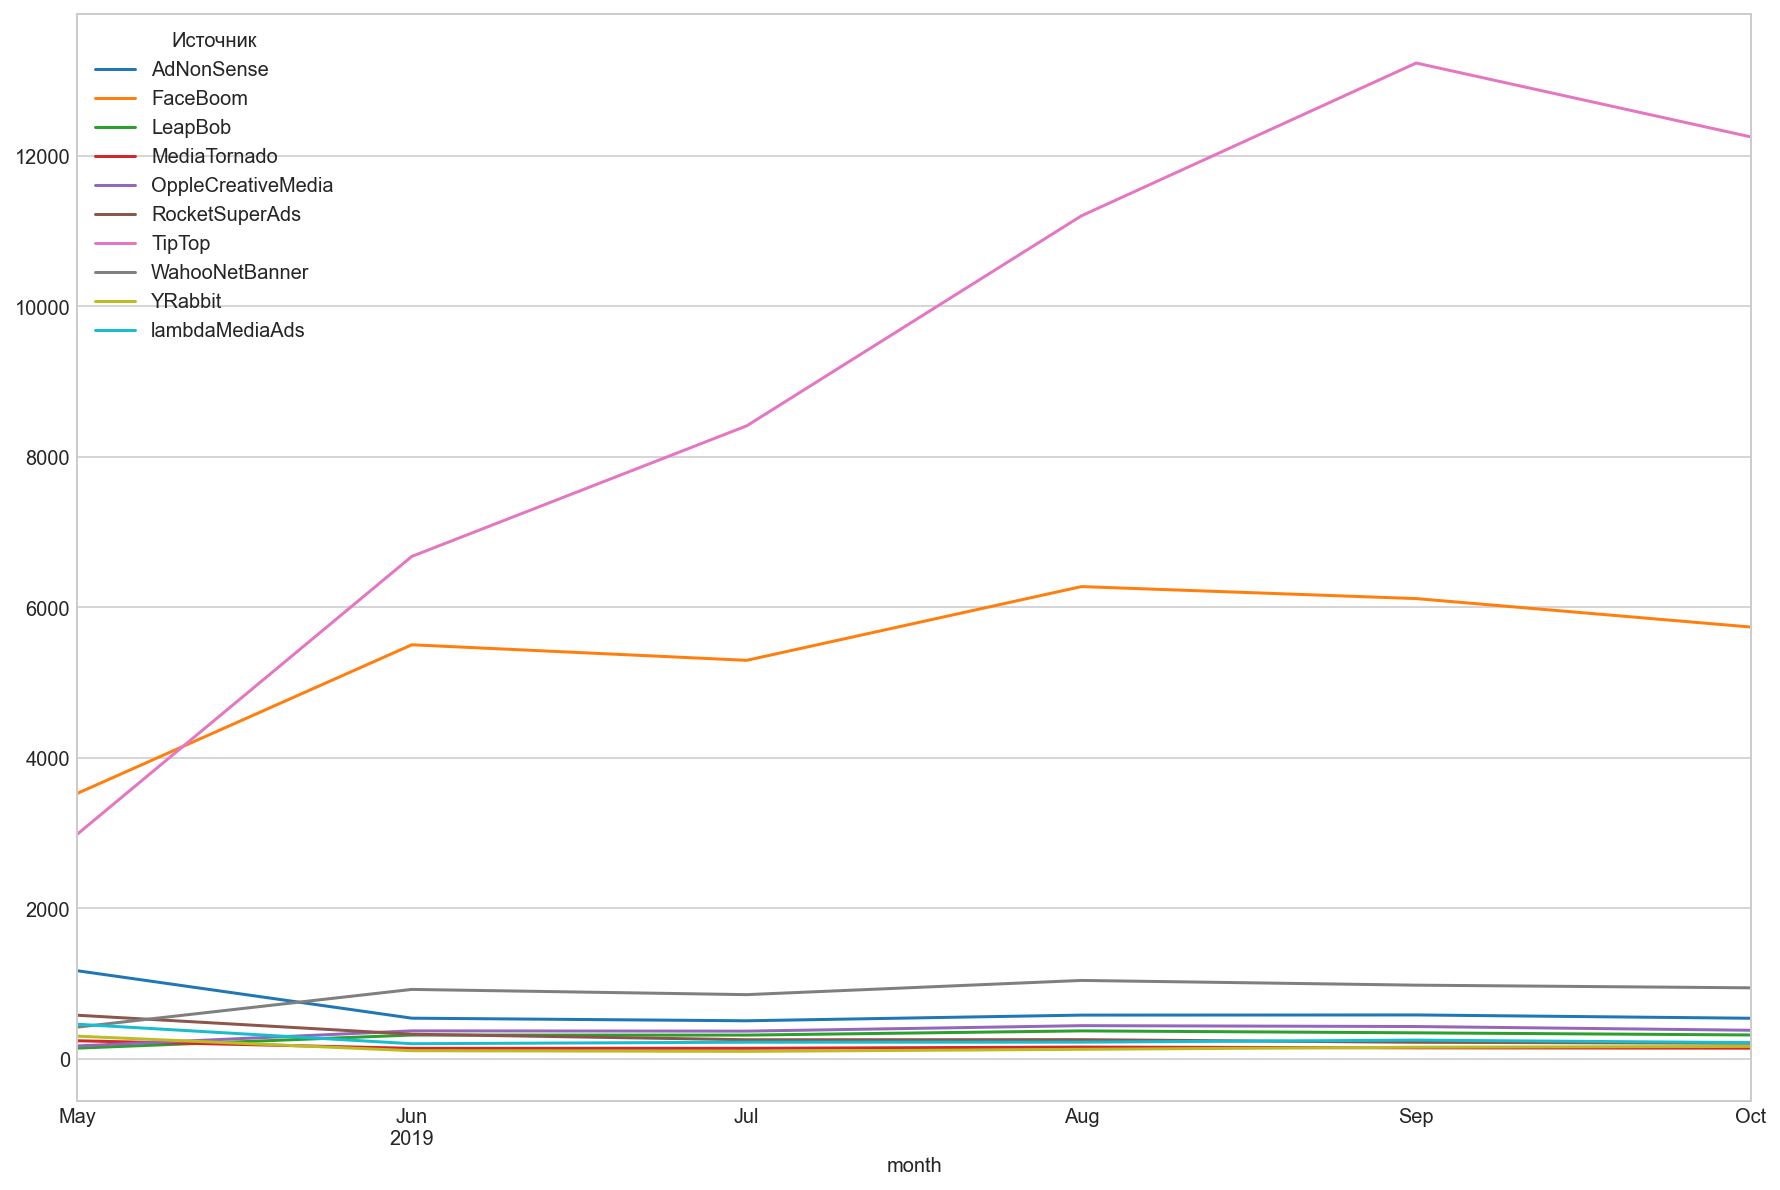

In [37]:
costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum') \
     .plot(figsize=(15, 10), grid=True) \
     .legend(title='Источник', title_fontsize=10, fontsize='medium', loc='best')
# построим график распределения маркетингового бюджета по каналам по месяцам

**Комментарий к полученному графику:**

- по графику видно, что самый большой рекламный бюджет у канала **"FaceBoom"** - более того, практически каждый месяц рекламы откручивалось все больше и больше, так в мае было выделено порядка **3000 рублей**, а в сентябре - уже **более 12000 рублей**
- второй канал по величине выделяемого бюджета - **"TipTop"** - с ним ситуация более стабильная, порядка **4000 - 6000 рублей** в месяц было выделено на этот канал
- поскольку бюджеты всех каналов кроме FaceBoom и TipTop практически не различить, то посмотррим отдельно на затраты в месяц в диапозоне **0 - 1200**

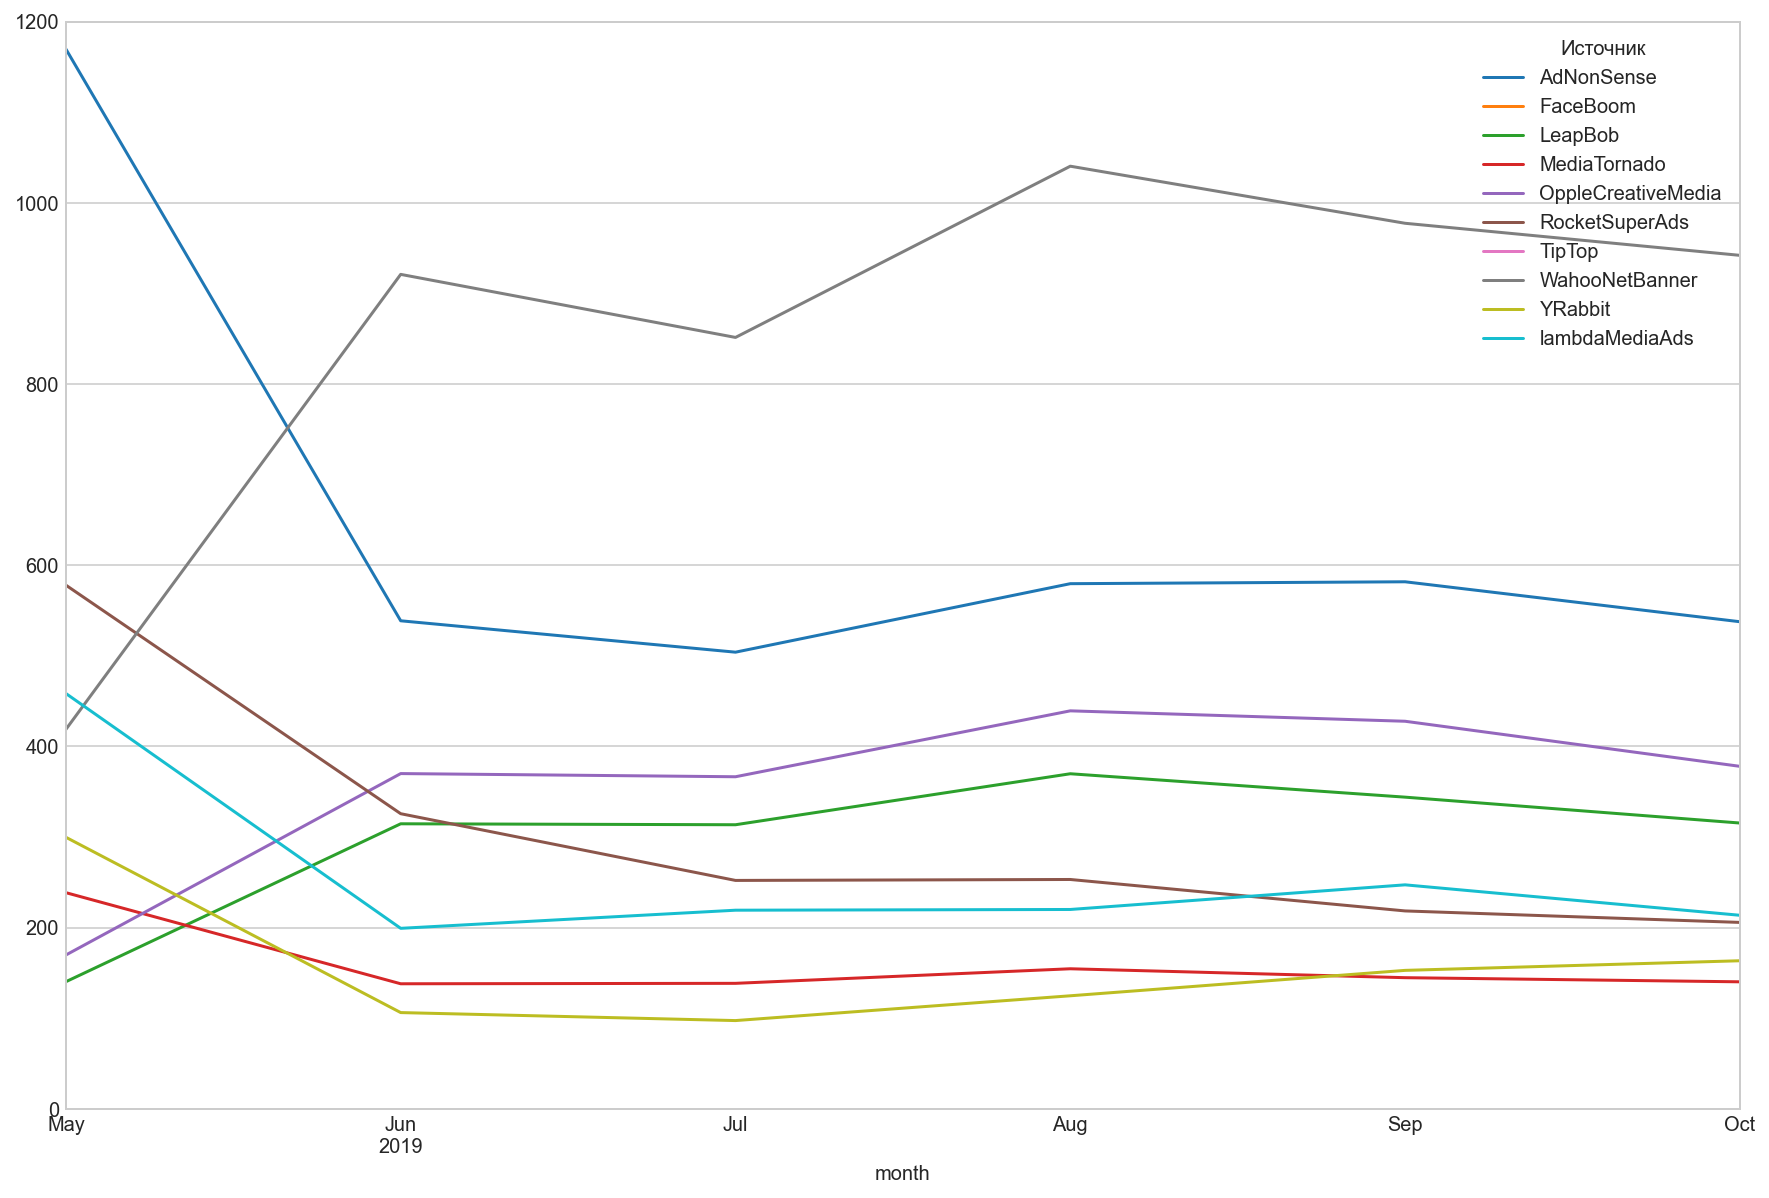

In [38]:
ax = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum') \
     .plot(figsize=(15, 10), grid=True, ylim=(0, 1200)) \
     .legend(title='Источник', title_fontsize=10, fontsize='medium', loc='best') 
# построим график распределения маркетингового бюджета по каналам по месяцам

**Комментарий к полученным графикам:**

- среди всех каналов, за исключением "FaceBoom" и "TipTop", которые были рассмотрены выше, больше всего вкладывается в канал - **"RocketSuperAds" - в среднем около 800 - 1000 рублей в месяц**
- в остальные каналы вкладывается **не более 600 рублей в месяц** 
- более того, бюджеты, выделяемые на каждый из каналов из месяца в месяц остаются практически одними и теми же, что свидетельствуют о том, что в компании не проводятся какие-либо экспирименты с креативами для каждого источника 

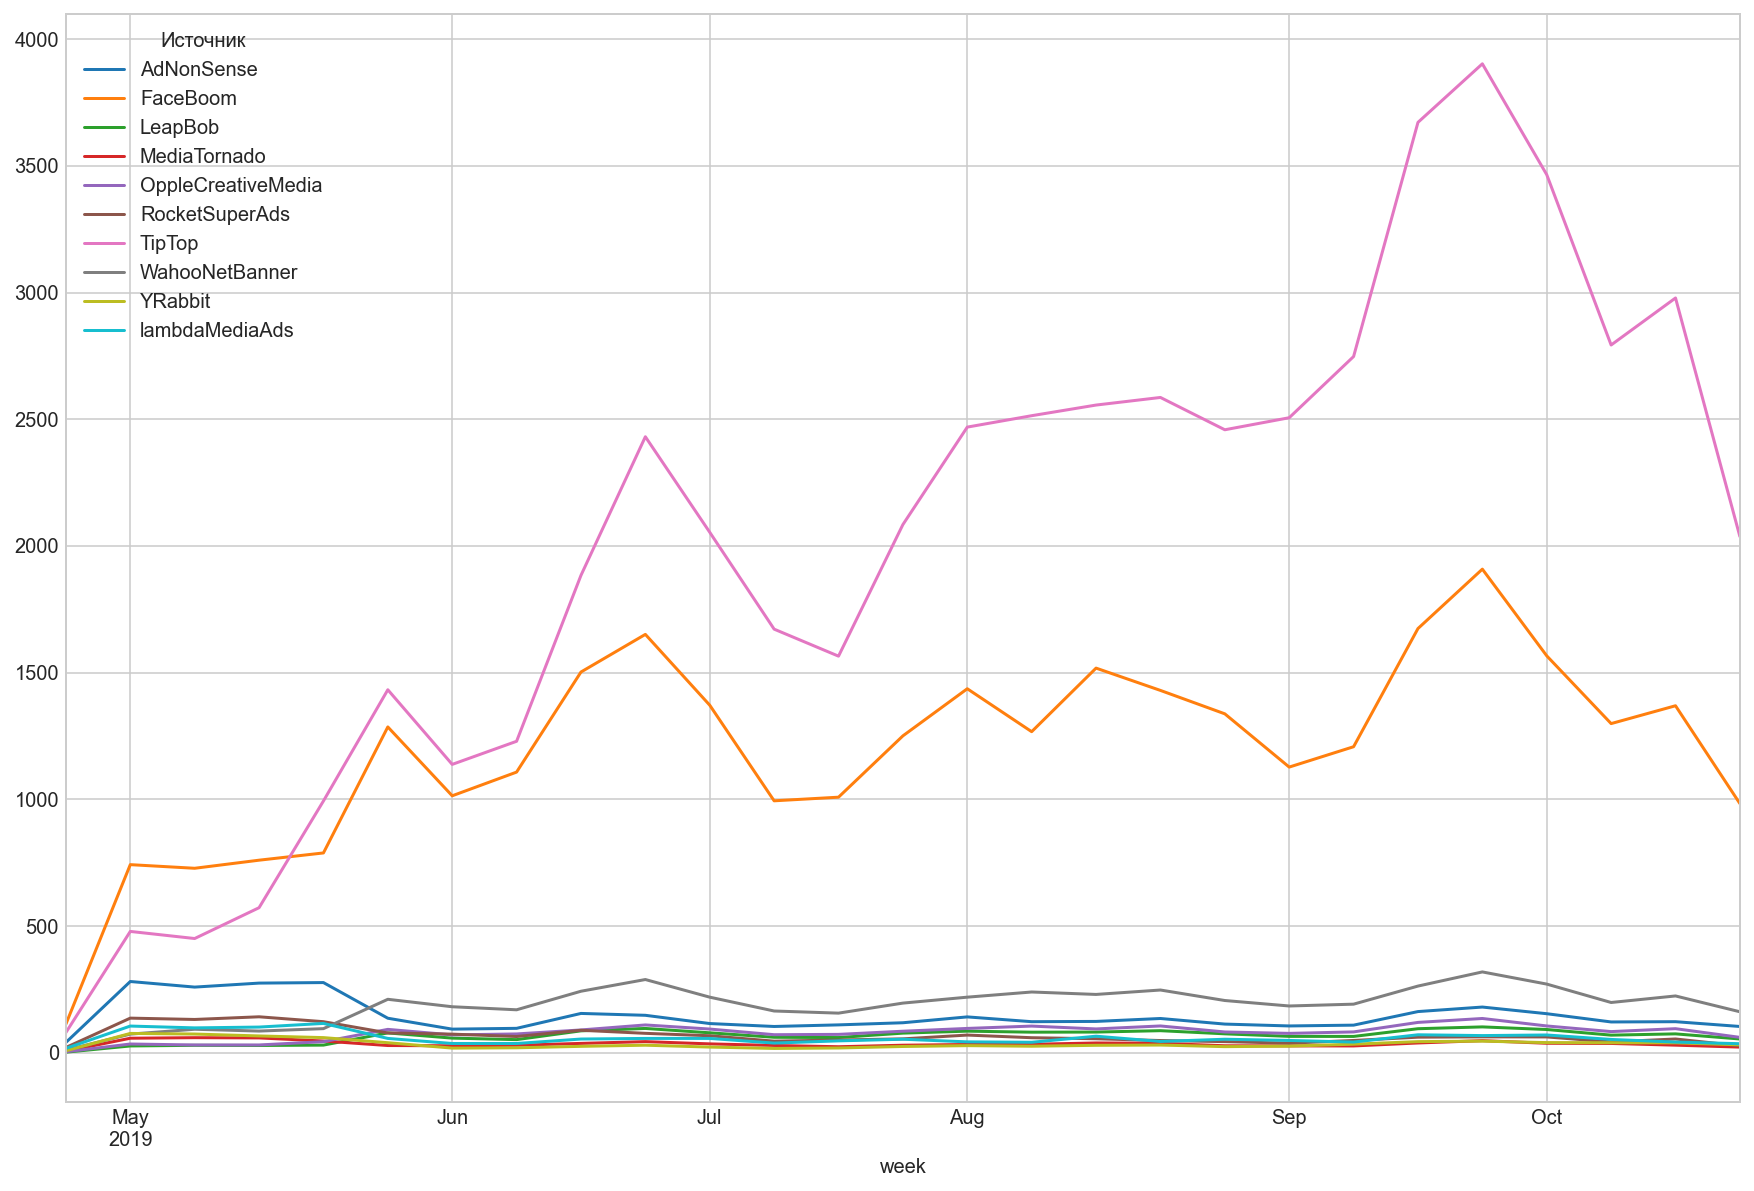

In [39]:
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum') \
     .plot(figsize=(15, 10), grid=True) \
     .legend(title='Источник', title_fontsize=10, fontsize='medium')
# строим график распределения маркетинвого бюджета по каждому из каналов по неделям

**Комментарий к полученному графику:**

- поскольку бюджеты всех каналов кроме FaceBoom и Tip Top практически не различить, то посмотррим отдельно на затраты в неделю в диапозоне 0 - 350

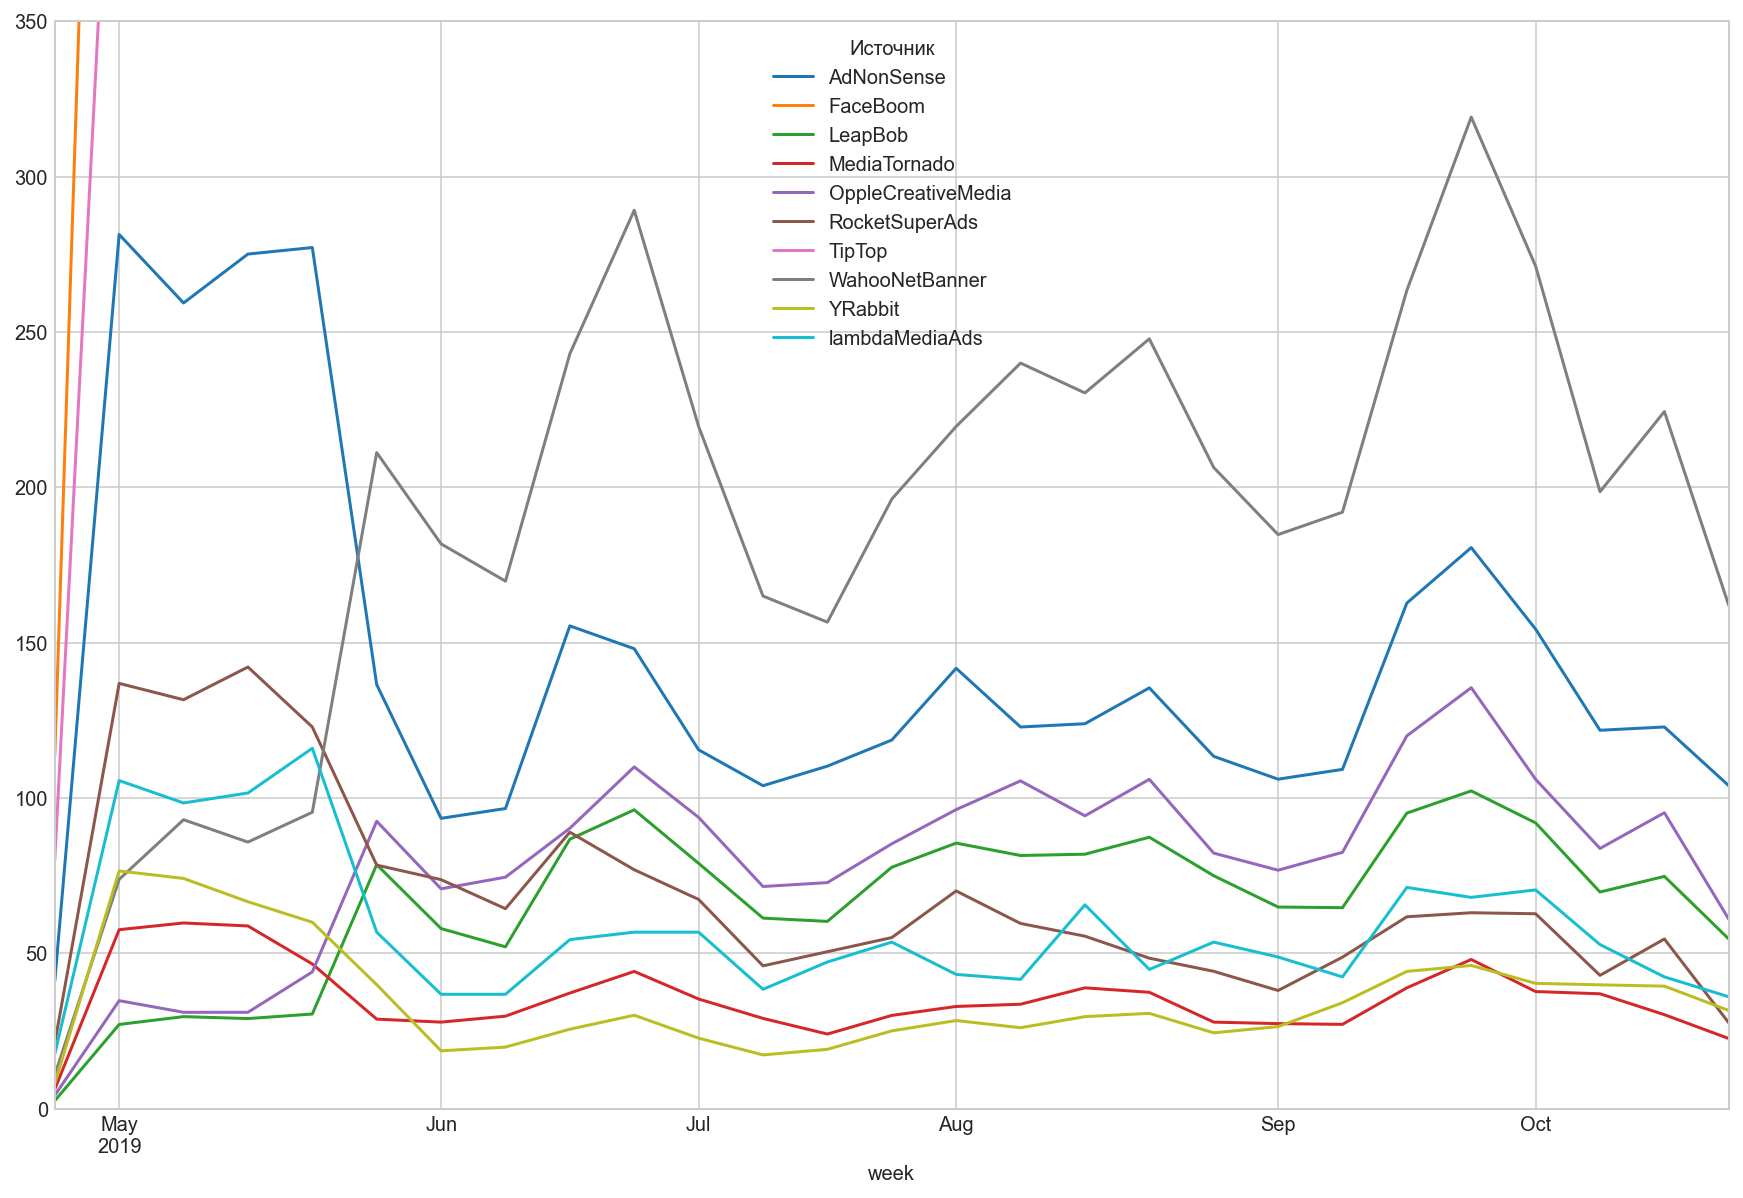

In [40]:
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum') \
     .plot(figsize=(15, 10), grid=True, ylim=(0, 350)) \
     .legend(title='Источник', title_fontsize=10, fontsize='medium', loc='best')
# строим график распределения маркетинвого бюджета по каждому из каналов по неделям

In [41]:
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False).to_frame()
# считаем среднюю стоимость привлечения пользователя по каждому каналу

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

In [42]:
profiles['acquisition_cost'].mean()
# посчитаем среднюю стоимость привлечения пользователя всей маркетинговой активности за исследуемый период

0.7032778251827625

### Итоги анализа маркетинговой деятельности:


- общий маркетинговый бюджет исследуемого периода составил **105497 рублей**
- большая часть идет на **"FaceBoom" и "TipTop"** - в них вкладывается в среднем по **5407 и 9125 рублей в месяц** соответственно
- в остальные каналы привлечения в среднем в месяц вкладывается **от 150 до 1000 рублей** 
- самый высокий CAC у канала **"TipTop" - 2.8 рублей**, а у самого эффективного канал привлечения - **"FaceBoom" - лишь 1.1 рубль** - в него можно и нужно вкладывать больше денег, даже несмотря на тот факт, что средний CAC по проекту **0.7 рублей за юзера**, ведь из "FaceBoom" приходят **качественные пользователи**

***Таким образом,наибольшюу маркетинговую активность приложения "Procrastinate Pro+" можно наблюдать в каналах - "FaceBoom" и "TipTop", в них вкладывается значительно больше, чем в остальные каналы - порядка 70-80% общего рекламного бюджета, что и подтверждается стоимостью привлеченного пользователя - в "TipTop" и "FaceBoom" CAC составил 2.8 и 1.1 рубля соответственно***

## Шаг 5. Оценка окупаемости рекламы


**Прежде чем перейти к исследованию маркетинговых затрат необходимо исключить органических юзеров из наших данных, иначе они исказят сиутацию с метриками, ведь за органику мы ничего не платим**

In [43]:
paid_profiles = profiles[profiles['channel'] != 'organic']

In [44]:
paid_visits = visits[visits['channel'] != 'organic']

In [45]:
observation_date= datetime(2019, 11, 1).date()

In [46]:
horizon_days = 14

In [47]:
horizon = 14

In [48]:
retention_raw, retention, retention_history = get_retention(paid_profiles, paid_visits, observation_date, horizon_days)
# получаем таблицы удержания

In [49]:
conversion_raw, conversion, conversion_history = get_conversion(paid_profiles, orders, \
                                                    observation_date, horizon_days)
# получаем таблицы конверсии

In [50]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(paid_profiles, orders, observation_date, \
                                                      horizon_days)
# получаем таблицы LTV и ROI в разбивке по стране пользователя

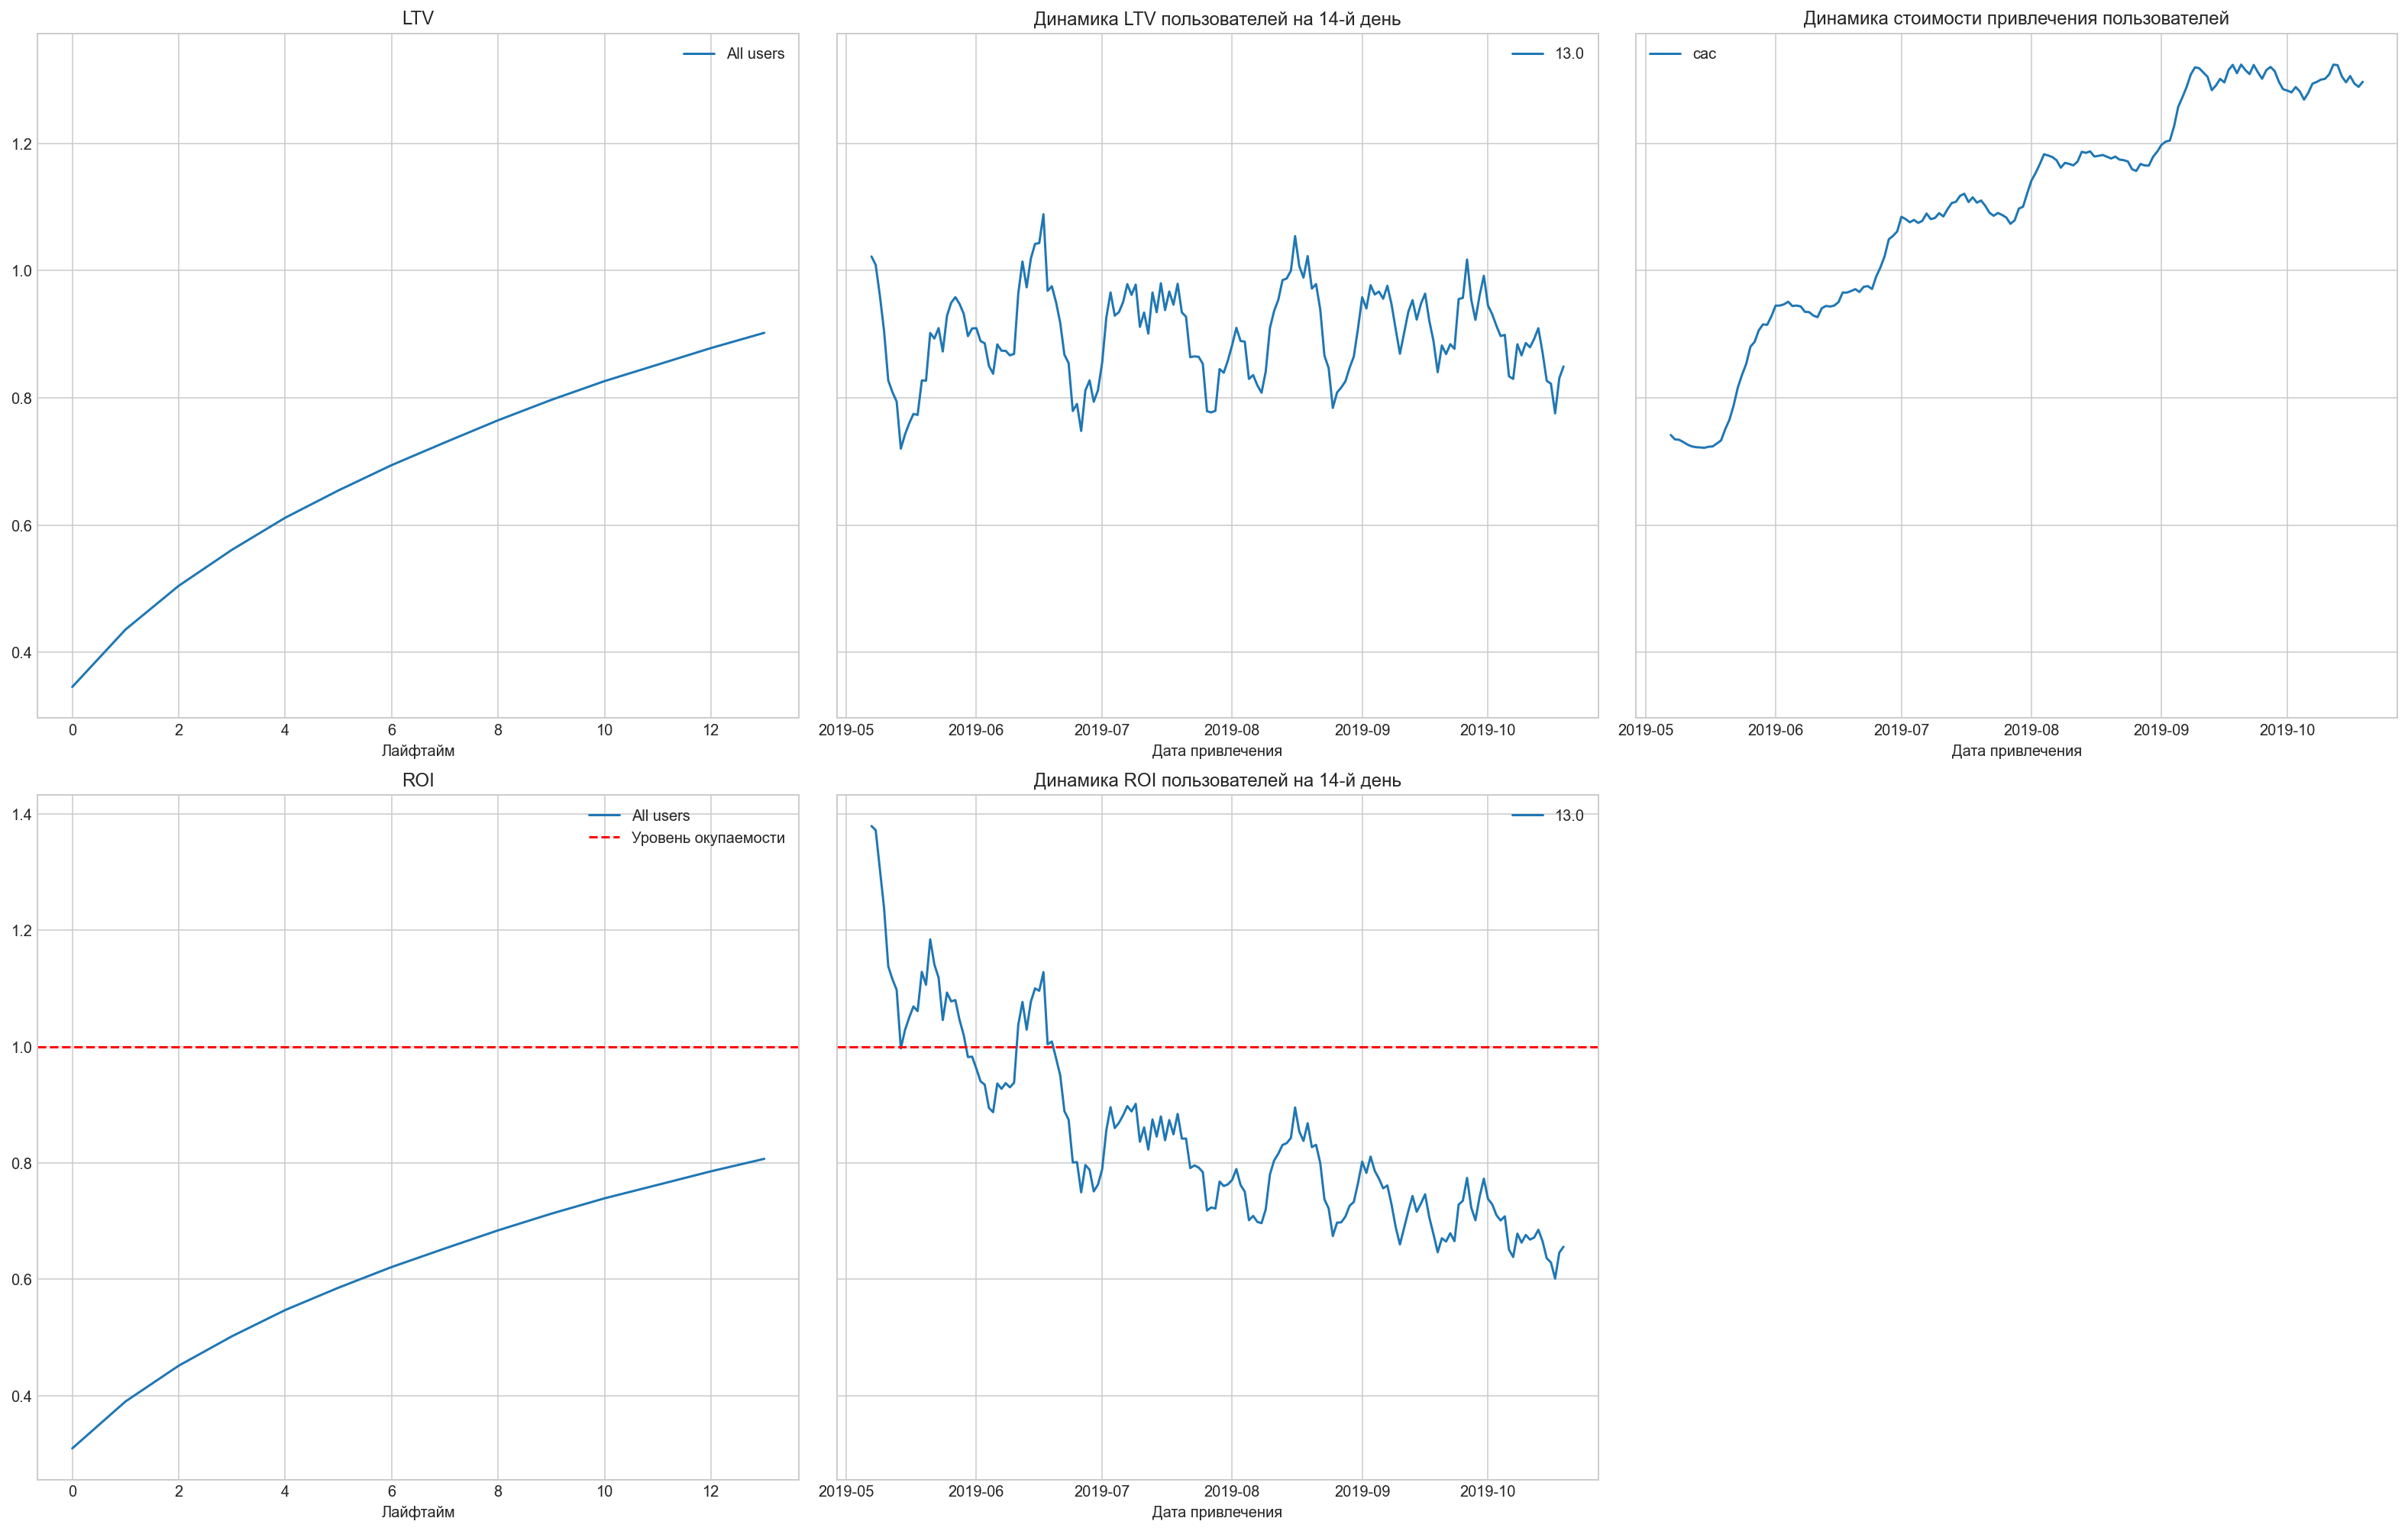

In [51]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7)
# строим графики по полученным данным

**Комментарий к полученным графикам:**

- LTV с увелечением лайфтайм растет - значит в данных ошибок нет (поскокльку чем больше времени проходит, тем больше пользователей совершают покупки - доконверчиваются)
- по графику динамики LTV можно заметить, что июньские когорты, принесли больше всего денег, и в целом, начиная с июня минимальная выручка от когорты выросла с **0.5 до 0.6**
- а также в каждом месяце бывали когорты, которые приносили, которые приносили на **0.2 рубля больше**, чем "обычные" когорты - **по 0.7 - 0.8**
- переходя к графику CAC, можно увидеть резкий рост средней стоимости привлечения, скорее всего, связанный с тем, что компания начала выделять бОльшие бюджеты с высоким CAC - **"FaceBoom" и "TipTop"**
- отвечая на один из основных вопросов - "окупается ли реклама?" - реклама не окупается, однако к **16-18 дню жизни** наших пользователей она, скорее всего, окупится, так как за двух недельный период с момента привлечения ROI составляет около **95-98%**
- разобраться, почему же реклама не окупается поможет график с динамикой ROI, на нем видно, что до **середины июня** привлечение новых пользователей было рационально, даже несмотря на то, что с начала мая мы имели **сильный нисходящий тренд**, который приостановился в **начале июня**
- однако с с середины июня падение продолжилось, и с **июля уже привлечение новых пользователей не окупалось**

***Таким образом, на данный момент, можно сказать, что реклама не окупается, от части это может быть связано с тем, что компания начала вливать маркетинговые бюджеты в каналы с более высоким CAC, ведь по динамике LTV можно заметить, что не было просадок относительно сверхприбыльного мая, однако в мае суммарный маркетинговый бюджет был около 10.000 рублей, а в июне уже более 15.000 рублей, поэтому несмотря на то, что среднее значение LTV выросло, база на которую мы делим - стоимость привлечения - так же выросла***

**Более конкретный ответ на вопрос: "почему же не окупается реклама?" - мы получим, когда изучим такие факторы, как тип девайса, страна пользователя и канал привлечения, но сейчас мы перейдем к рассмотрению конверсии и ретеншена - поскольку это тоже сильно влияет на то, как "чувствует" себя бизнес**

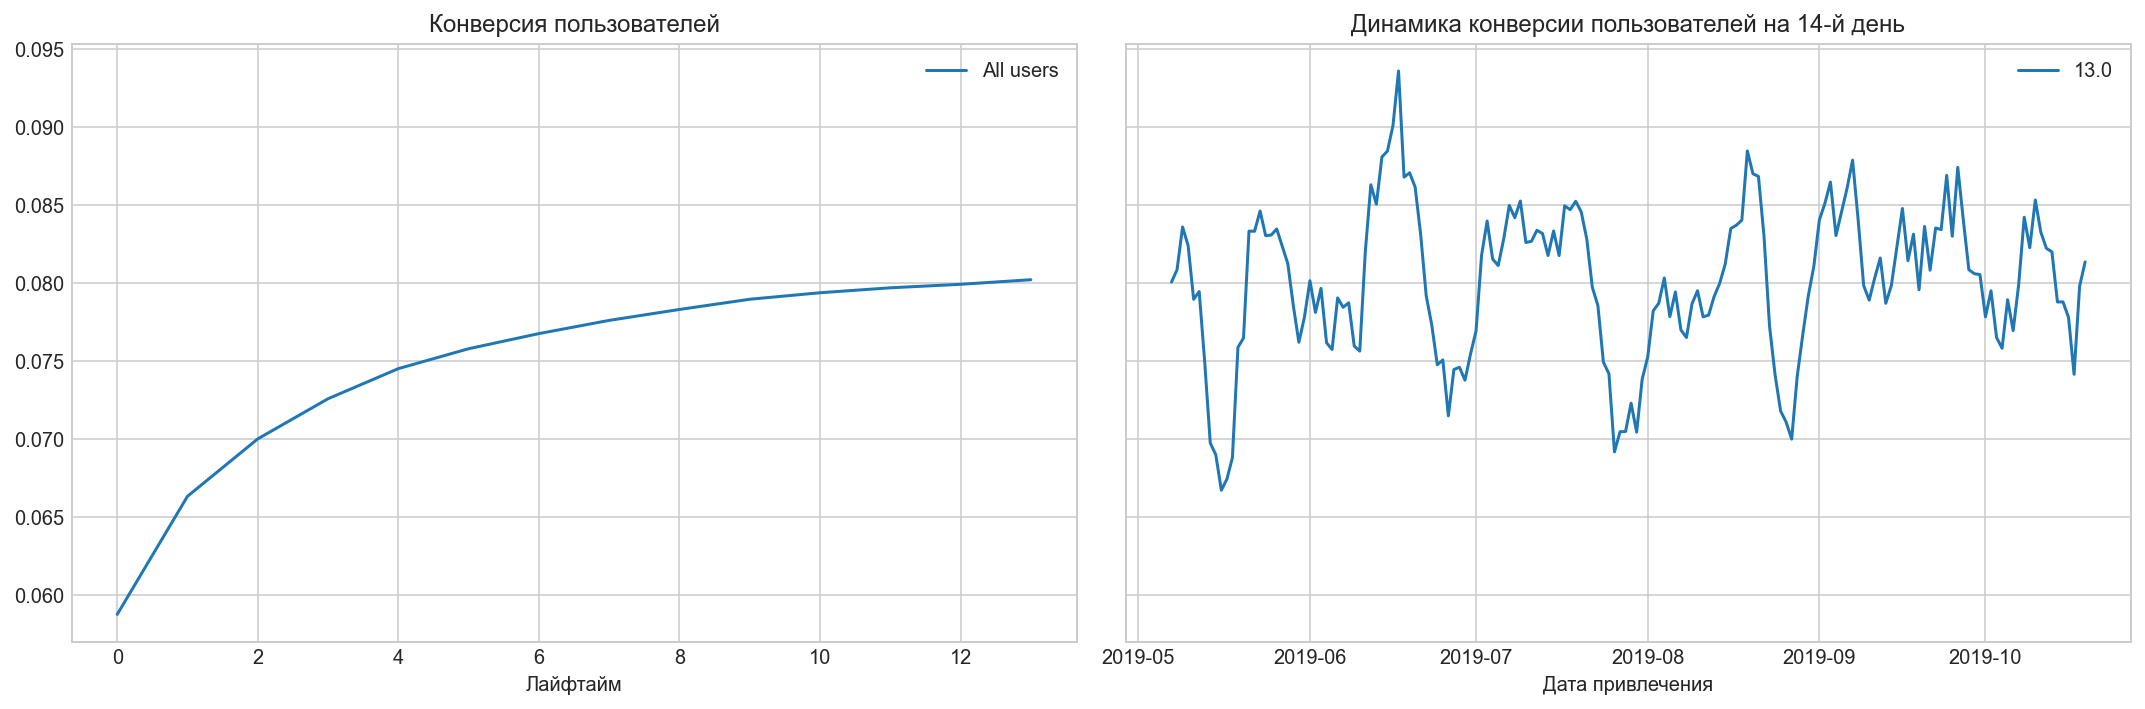

In [52]:
plot_conversion(conversion, conversion_history, horizon, window=7)
# строим графики по полученным данным конверсии

**Комментарий к полученным графикам:**

- Конверсия с увелечением лайфтайм растет - значит в данных **ошибок нет** (поскокльку чем больше времени проходит, тем больше пользователей совершают покупки - доконверчиваются)
- стоит отметить, что в мае наблюдалась наименьшая конверсия - чуть **больше 6.8%**, а если сопоставить это с информацией о LTV и ROI с гарфиков выше, то можно, предположить, что как раз причиной такого низкого LTV была низкая конверсия, однако затраты на маркетинг были тоже столь низкие, что те пользователи, которые совершали покупки, позволяли бизнесу **получать хороший коэф. возврата на инвестеции**
- а также **в июне** - в меясце с наибольшим LTV за исследуемые период - наблюдалась самая высокая **конверсия практически 9.5%**

**Далее мы перейдем к рассмотрению ретеншена**

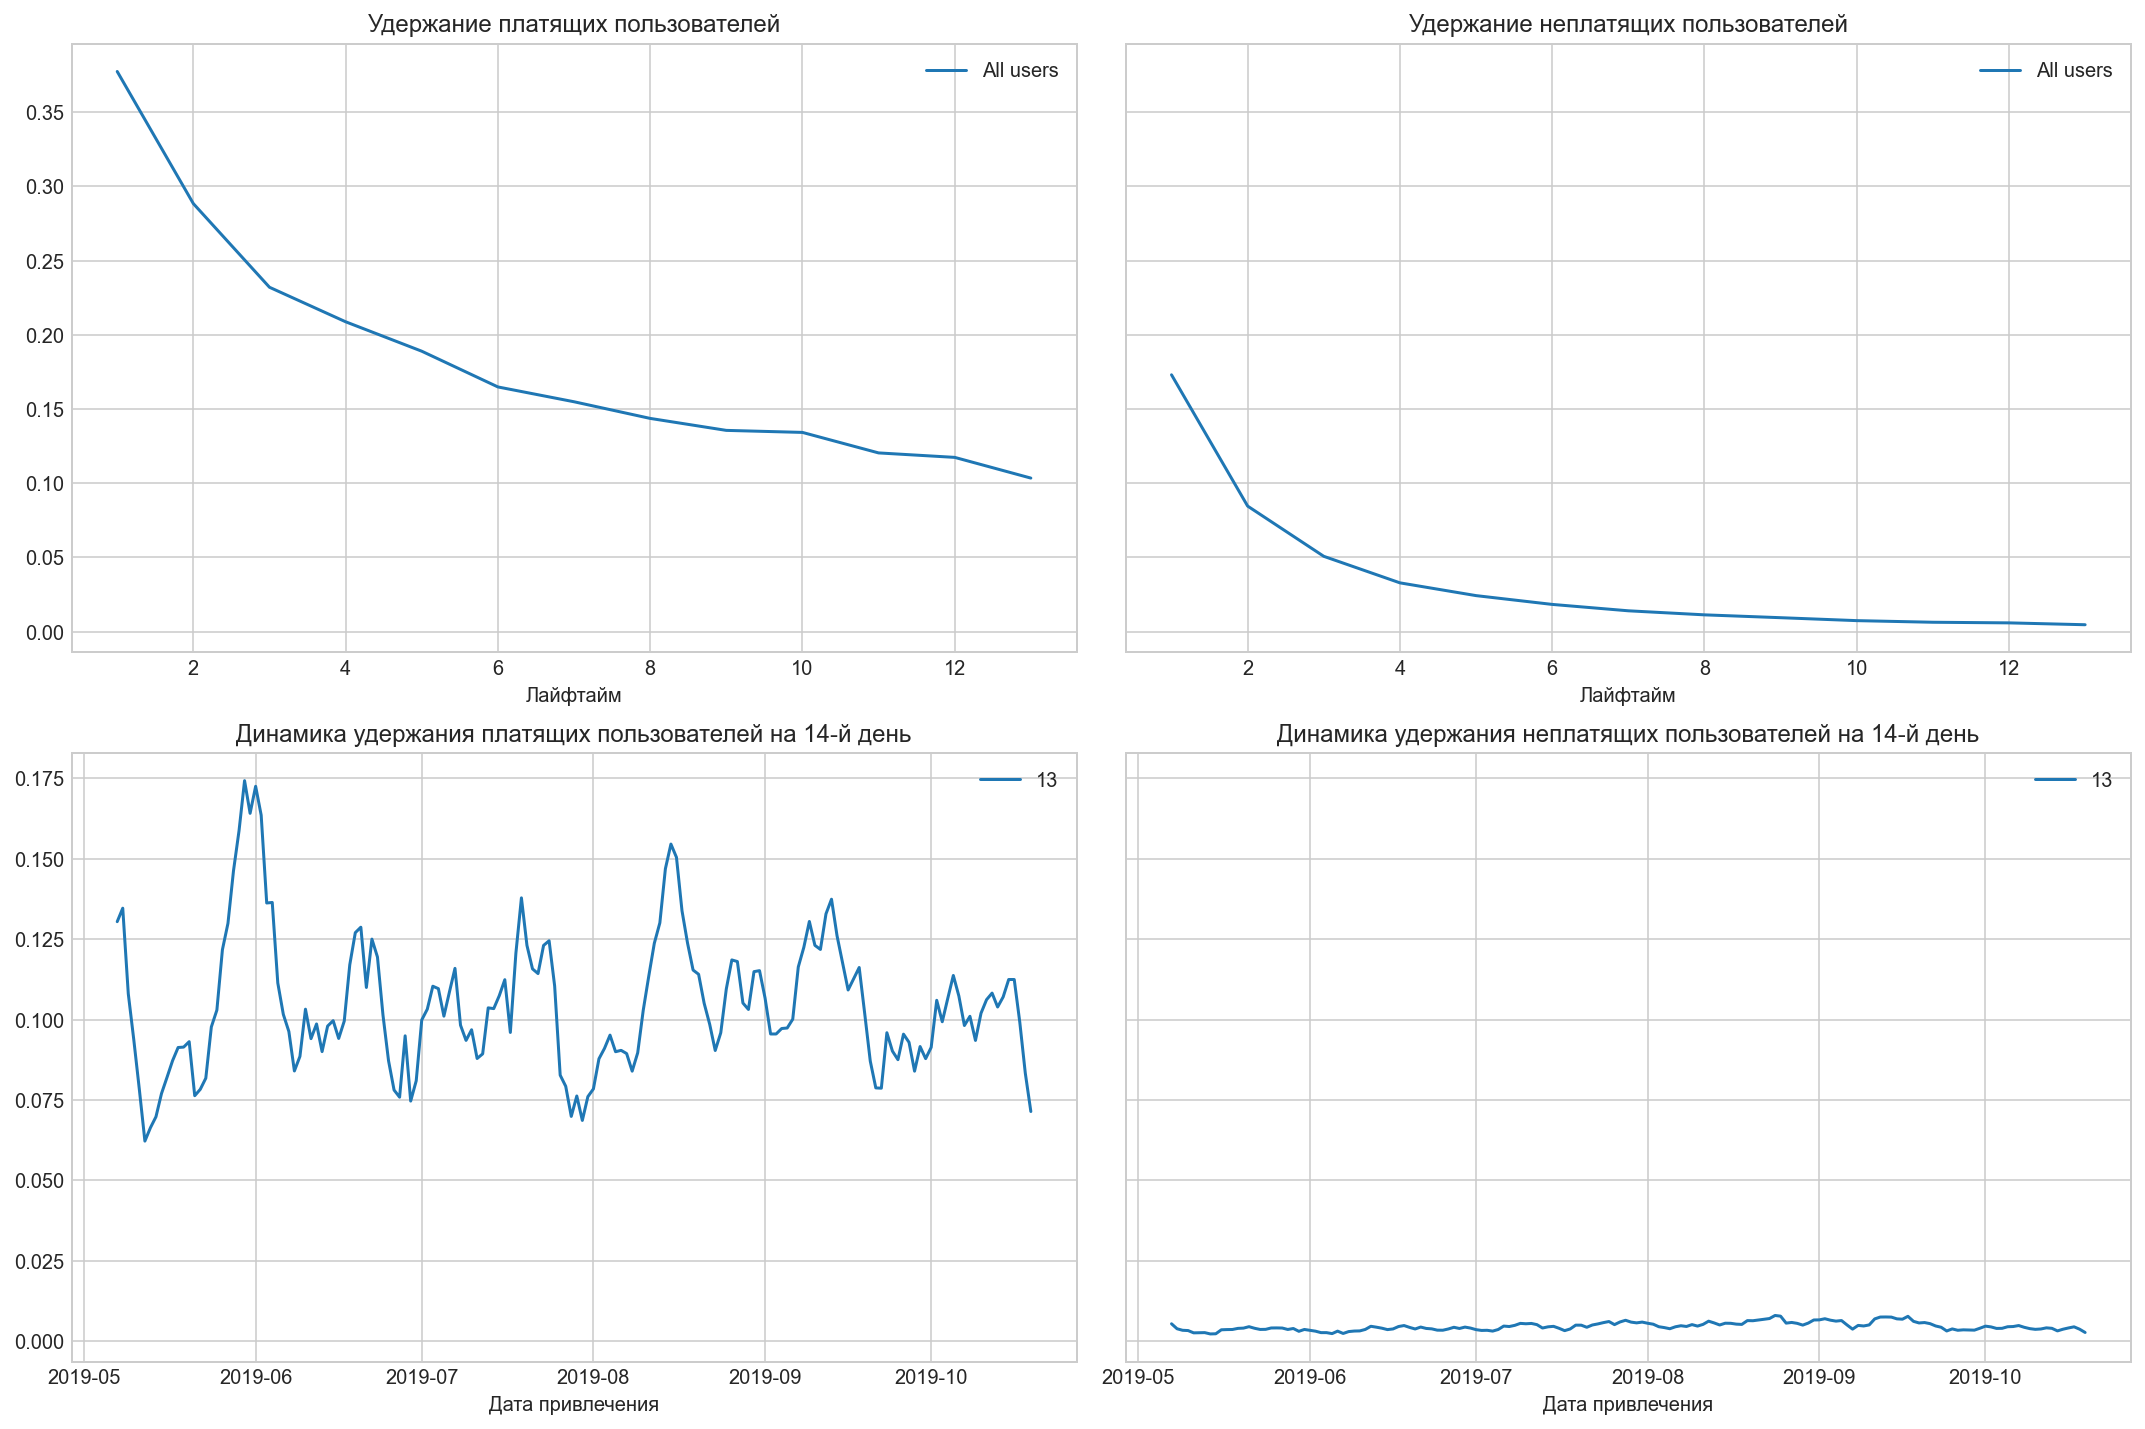

In [53]:
plot_retention(retention, retention_history, horizon, window=7)
# строим графики по полученным данным ретеншена

**Комментарий к полученным графикам:**

- ожидаемо, **неплатящие пользователи удерживаются хуже, чем платящие** - здесь ничего нового
- в динамике удержания неплатящих юзеров все +/- предсказуемо - очень низкий уровень удержания
- а вот в динамике удержания платящих без сюрпризов не обошлось - неожиданно, в июне мы можем наблюдать регулярные **просадки в удержании до 7.5%**, что **ниже** среднего уровня +/- **на 5%**, это может объясняться тем, что к нам приходят часть пользователей "горячих" пользователи - имеющие боль здесь и сейчас, однако для них, видимо, проведение времени в приложении с развлекательным контентом - не самая частая активность, поэтому они решили свою потребность, например, человек попал в больницу или слег с больничным, высвободилось много времени, вот он и стал нашим юзером, а как выздоровел и вернулся к привычному графику - перестал нами пользоваться, а другая часть - с более регулярным запросом на развлечение, тут уже надо отслеживать каждый креативо по отдельности и анализировать, какой контент привлекает таких "постоянных" юзеров
- гипотез, объясняющих феномены из пункта выше, может быть множество, поэтому для решения этого вопроса нужно более детально изучить наших пользователей

**Далее мы изучим LTV и ROI с учетом таких параметров, как тип устройства, регион и канал привлечения пользователя**

In [54]:
ltv_raw_dev, ltv_dev, ltv_history_dev, roi_dev, roi_history_dev = get_ltv(paid_profiles, orders, \
                                                            observation_date, horizon_days, dimensions=['device'])
# получаем таблицы LTV и ROI в разбивке по типу девайса пользователя

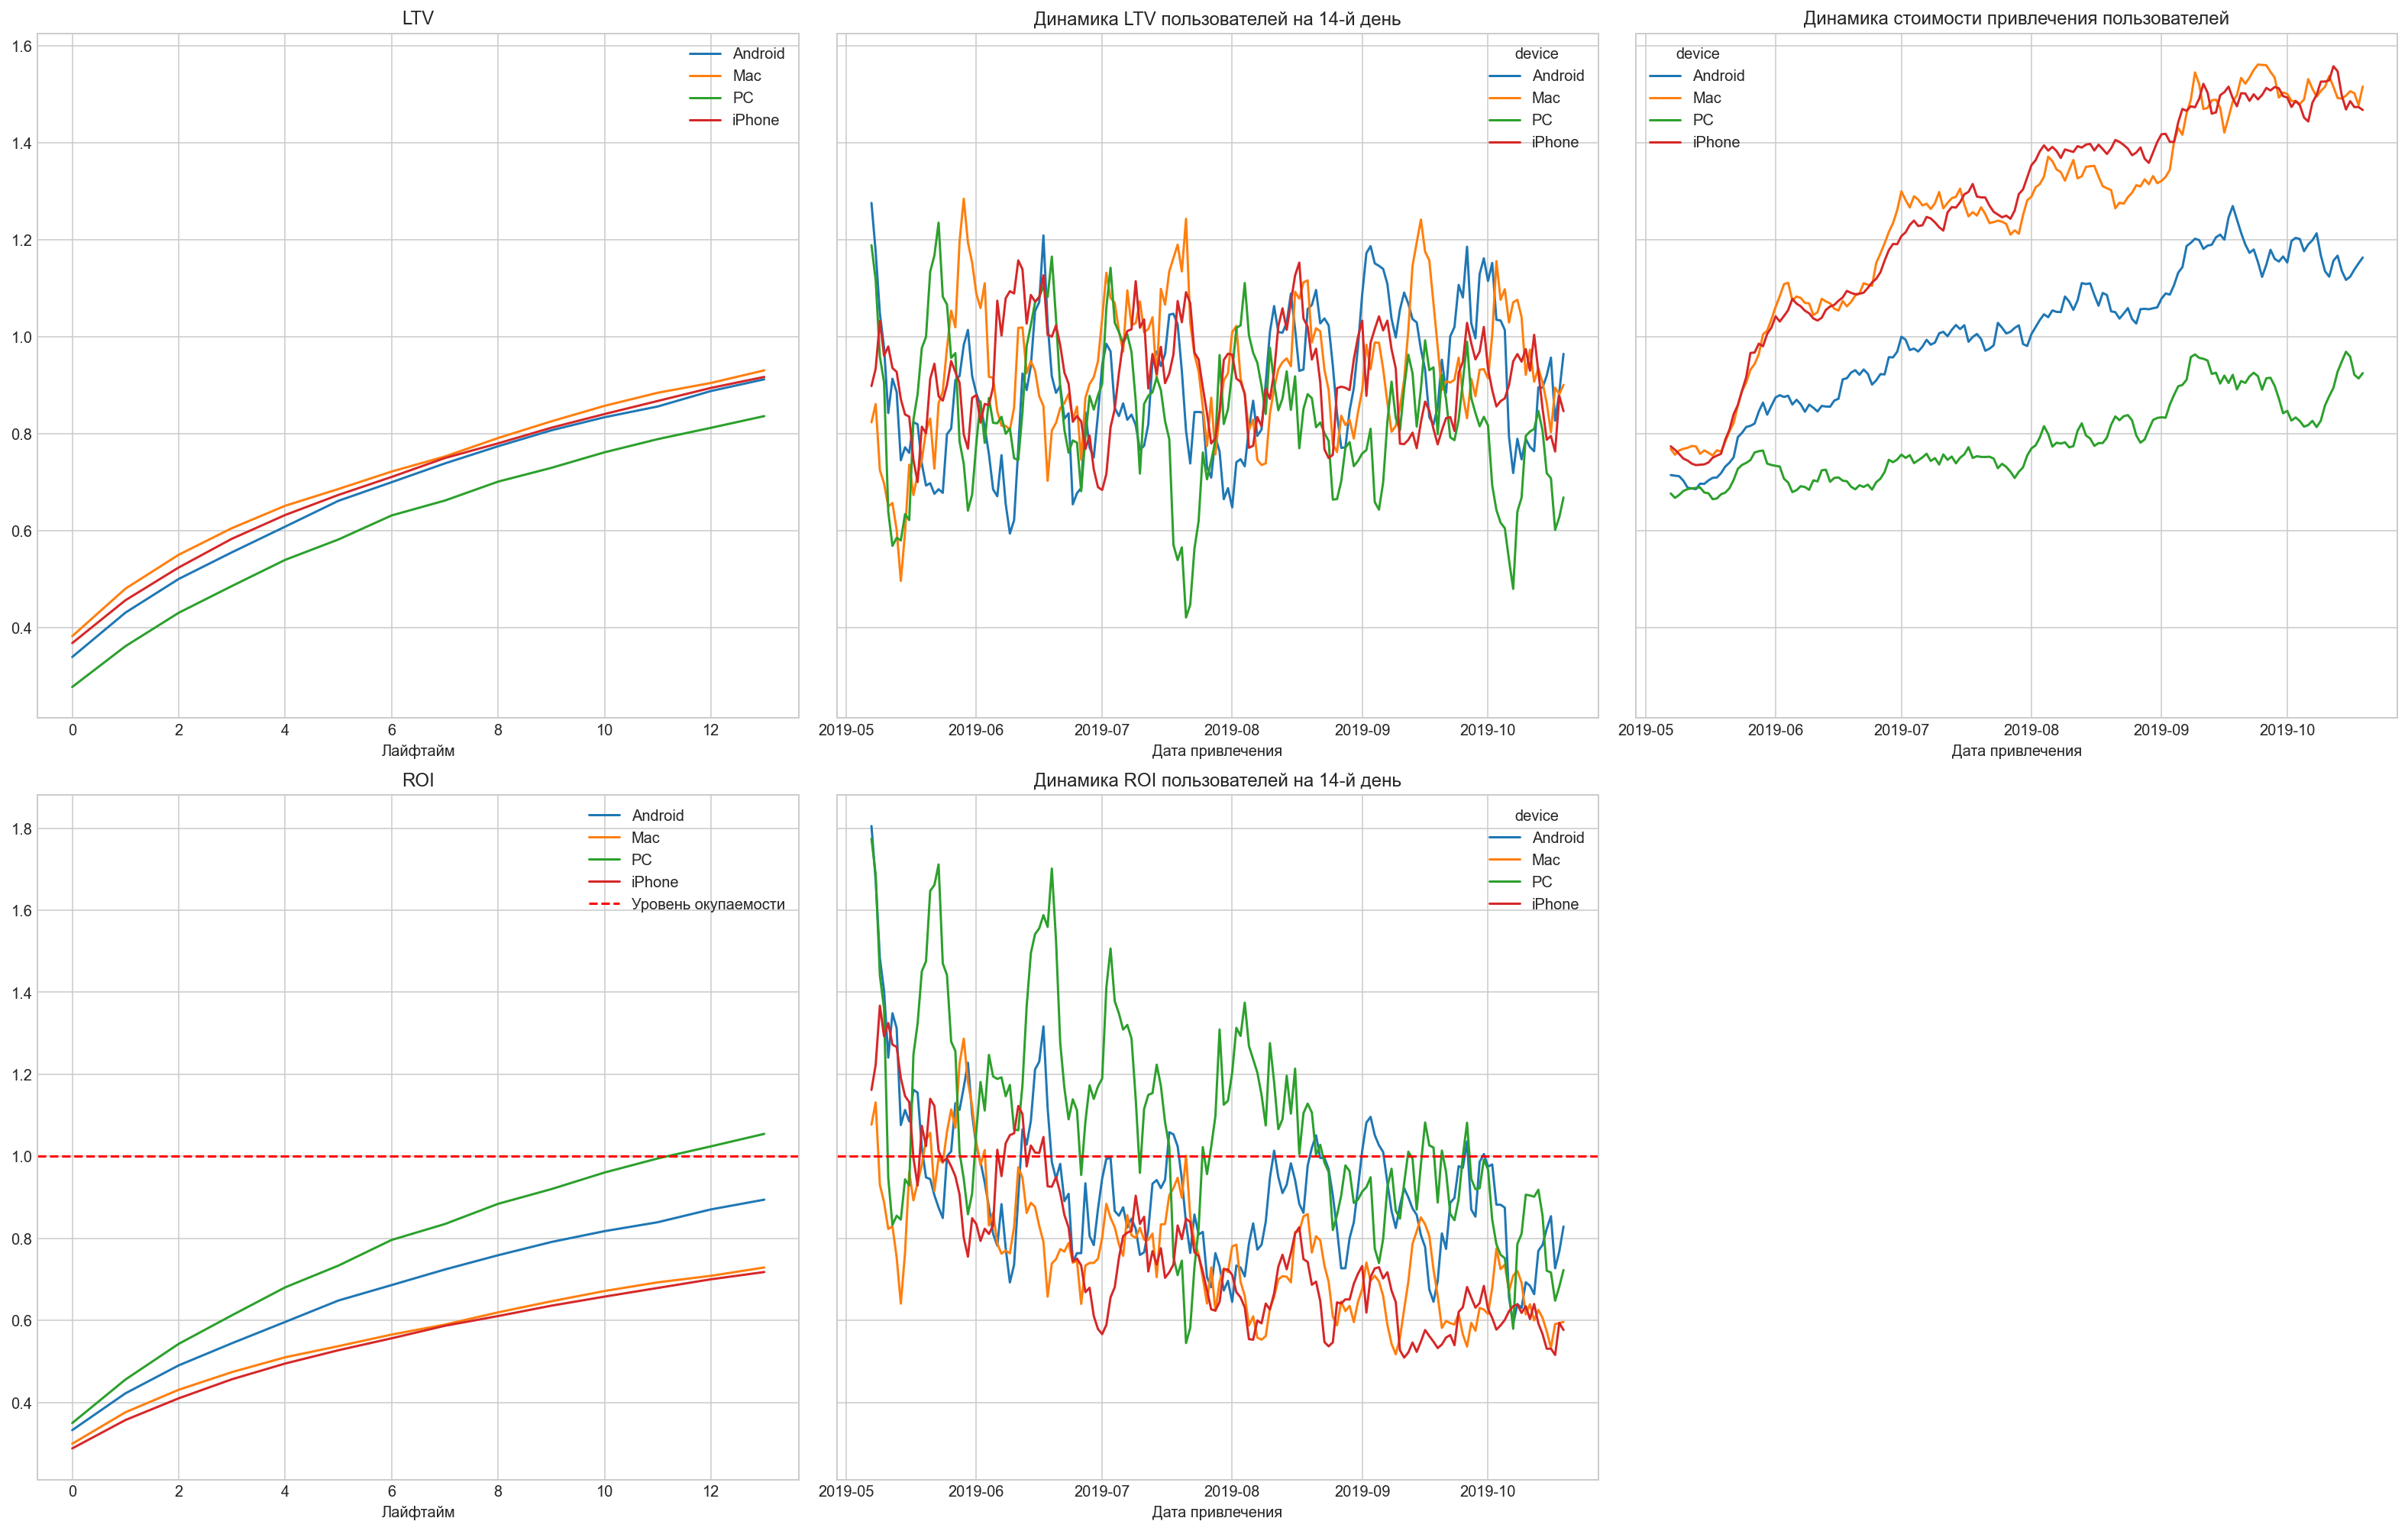

In [55]:
plot_ltv_roi(ltv_dev, ltv_history_dev, roi_dev, roi_history_dev, horizon, window=7)
# строим графики по полученным данным

**Комментарий к полученным графикам:**

- наибольший LTV у пользователей **Mac**, наименьший - **PC**
- по динамике LTV можно сказать, что не было одного наиболее успешного месяца для всех типов девайсов, так как максимум LTV для пользователей **PC и Mac - конец мая июля, для Android - середина июня, а для Iphone - середина августа**
- соответственно, ситуация с ROI такая же, как и в разбивке по месяцам - за счет низкой базы пользователи **PC окупаются**, а вот юзеры, привлеченные с большей средней стоимостью, на **Android, Mac и Iphone - не окупились**
- виден спад ROI по всем типам устройств, однако для пользователей PC он наименьший, что и соответствует тому, что с июня начался резкий рост стоимости привлечения, однако пропорционально больше пользователей не удалось привлечь, а средний чек новых пользователей +/- равен среднему чеку старых (объясняется ситуацией с динамикой ROI)


**Переходим к рассмотрению LTV и ROI с учетом региона пользователей**

In [56]:
ltv_raw_reg, ltv_reg, ltv_history_reg, roi_reg, roi_history_reg = get_ltv(paid_profiles, orders, \
                                                            observation_date, horizon_days, dimensions=['region'])
# получаем таблицы LTV и ROI в разбивке по стране пользователя

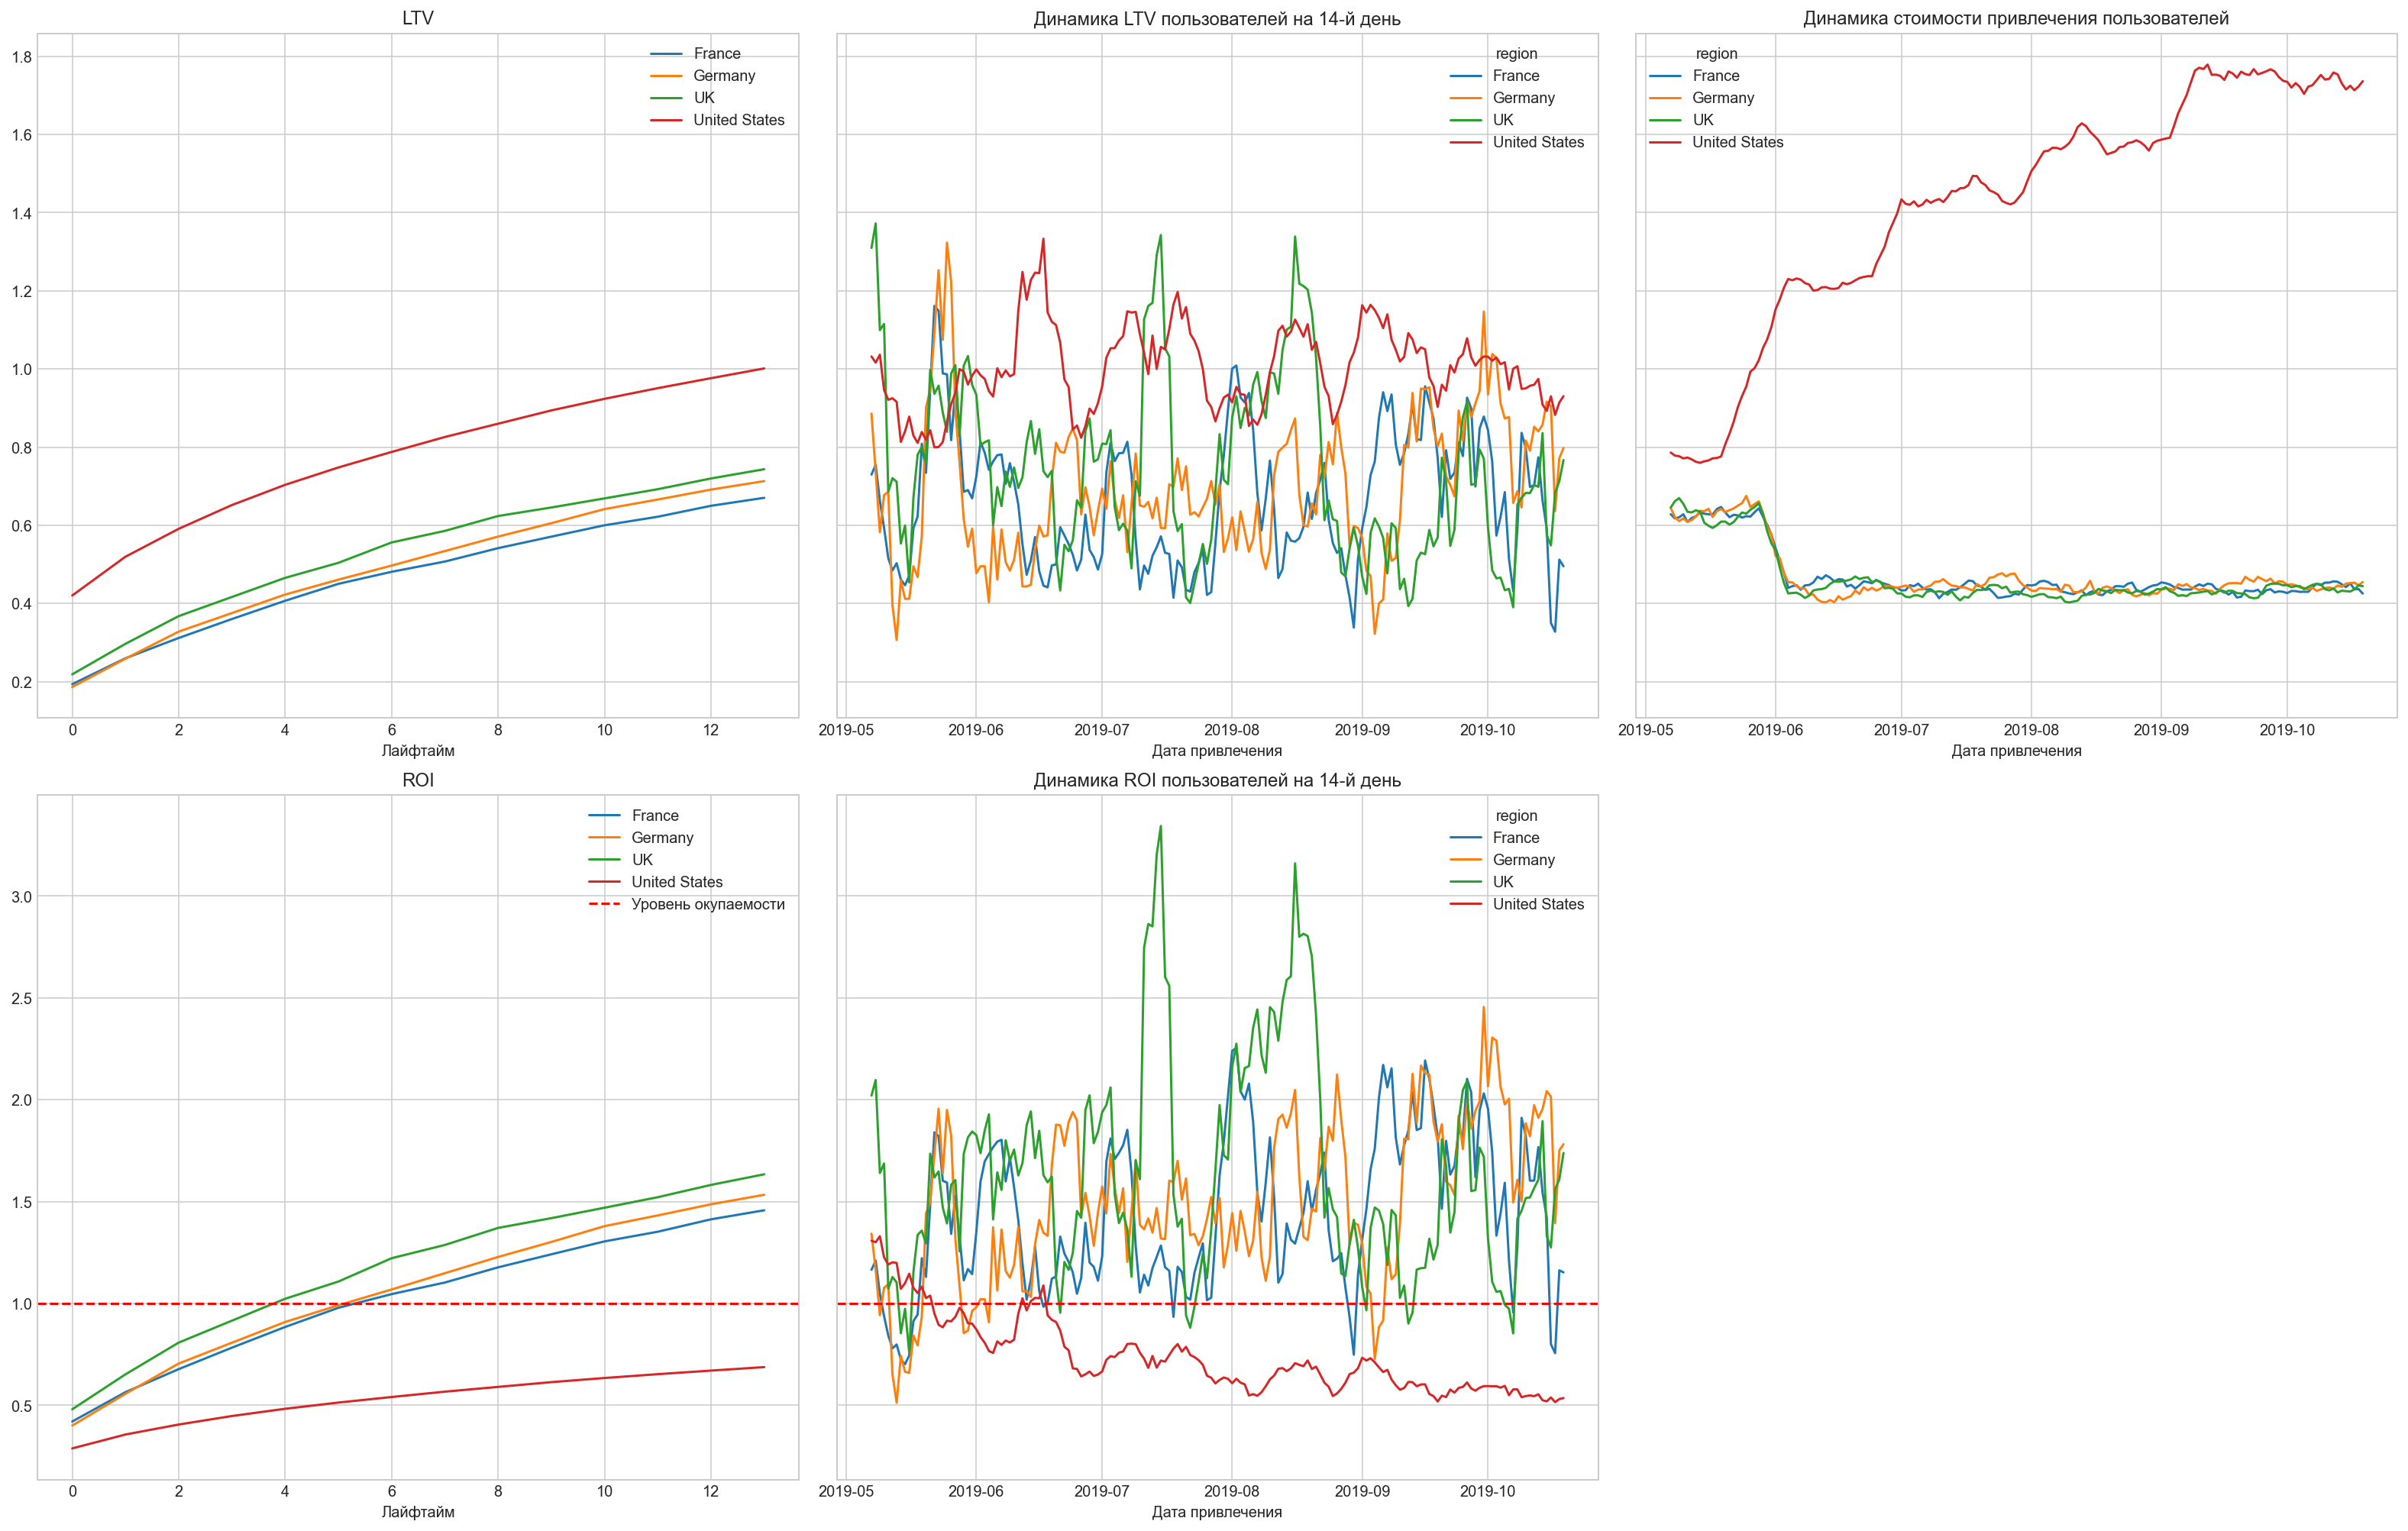

In [57]:
plot_ltv_roi(ltv_reg, ltv_history_reg, roi_reg, roi_history_reg, horizon, window=7)
# строим графики по полученным данным

**Комментарий к полученным графикам:**

- самый высокий LTV у пользователей из **США**, самый низкий - **Франции**
- Несомтря на то, что самый высокий LTV у американцев, но больше всего принесла когорта пользователей не из США, а из Англии, так **в середине июля когорта английских юзеров принесла в среднем более 1 рубля выручки на юезра**
- больше выручки принесла американская американская когорта в середине июня, а немецы в начале октября, а вот французы, **с самим низким показателем LTV**, принесли больше всего в начале августа, однако это значение не является каким-то пиком на всем графике - **чуть больше 0.8** - стандартный доход от пользователей из США
- а вот с привлечением юзеров на рынке США - беда, **стоимость привлечения взлетела с 0.35 - 0.38 до 1.1 и более** за пользователя, что эквивалентно **росту более чем на 300%**
- благо с привлечением остальных пользоватлей все в порядке, во Франции, Германии и Англии рекламные аукционы разогреты не так сильно, как в США
- и хоть пользователи из США приносят больше всех выручки, но и **стоимость привлечения** таких пользователей **гораздо выше - порядка 2-3 раз**
- по графику динамики ROI видно, как с середины мая начинает снижаться ROI, что и соответствует росту стоимости привлечения, однако стоит заметить, даже до того, как начался рост на рекламном аукционе в США, **показатель ROI пользователей из США был гораздо ниже**, чем на рынках европейских стран - **разница на 150% и более**

**Переходим к рассмотрению LTV и ROI с учетом канала привлечения пользователей**

In [58]:
ltv_raw_channel, ltv_channel, ltv_history_channel, roi_channel, roi_history_channel = get_ltv(paid_profiles, orders, \
                                                            observation_date, horizon_days, dimensions=['channel'])
# получаем таблицы LTV и ROI в разбивке по каналу привлечения

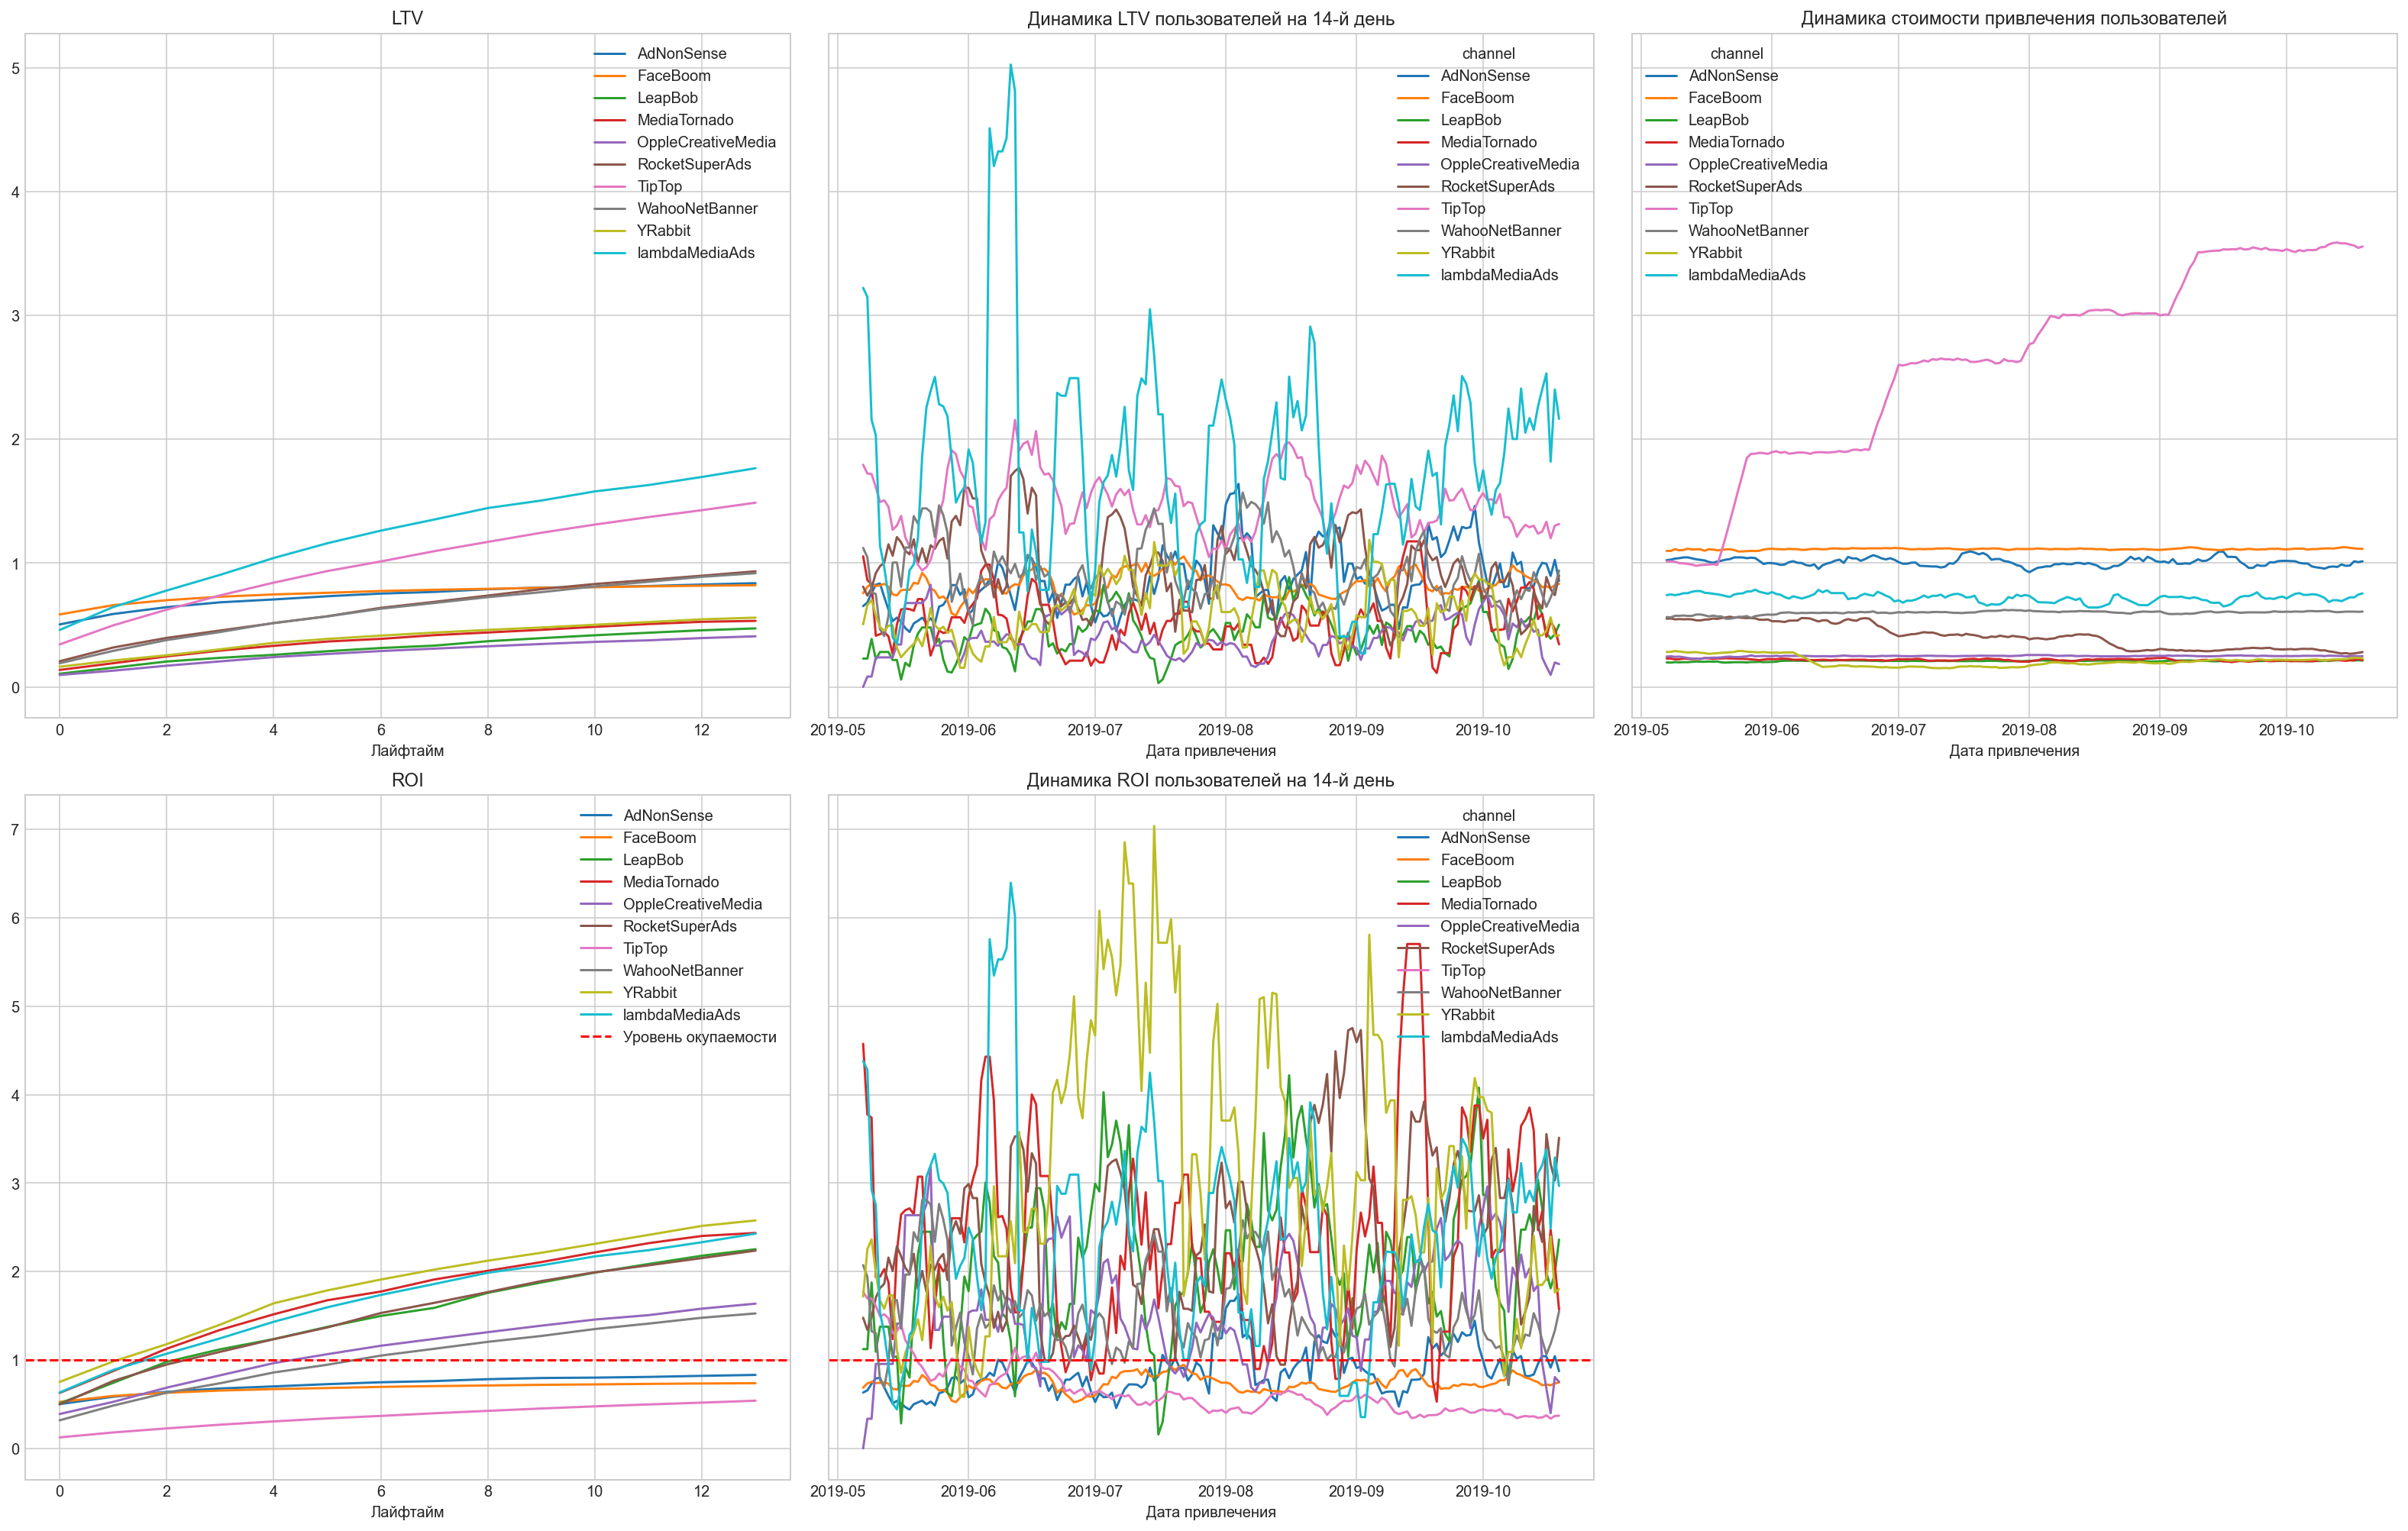

In [59]:
plot_ltv_roi(ltv_channel, ltv_history_channel, roi_channel, roi_history_channel, horizon, window=7)
# строим графики по полученным данным

**Комментарий к полученным графикам:**

- по графику ROI видно, что лишь 3 канала из 10 **не окупаются - это "TipTop", "FaceBoom" и "AdNonSense"**, остальные же каналы окупаются уже на **2 день жизни клиентов**, за исключением "OppleCreativeMedia" и "WahooNetBanner" - эти каналы окупаются за **6 дней**
- говоря о динамика ROI на 14-день по когортам, то стоит отметить пользователей привлеченных в последнюю неделю июня и в первые 3 недели июля, то есть в датах это около **24.06 - 23.07**, через канал с самым высоким показателем ROI - **"YRabbit"**
- также выдающиеся когорты пользователей были привлечены из **"lambdaMediaAds"**, пользователи пришедшие примерно с 5 по 12 мая принесли нам значительно больше средств, чем "обычные" юзеры из это канала - **как минимум на 200%** больше, а в основном разница составляет **от 300 до 400%**
- а из канала **"MediaTornado"** сверхприбыльные пользователи пришли в середине сентября, примерно с 09.09 по 13.09, эта когорта принесла почти на **200% больше**, чем самая прибыльная когорта этого источника 


In [69]:
paid_profiles['part_of_world'] = paid_profiles['region']\
                                .apply(lambda x: 'Am' if x == 'United States' else 'Eu')
# создаем столбец для построения графиков в разрезе США-Европа

In [75]:
paid_profiles.head()
# проверим, что все сработало корректно

user_id            first_ts     channel   device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom   iPhone  United States   
3  22593348 2019-08-22 21:35:48  AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit   iPhone  United States   
7  46006712 2019-06-30 03:46:29  AdNonSense  Android         France   

           dt      month  payer  acquisition_cost part_of_world  
0  2019-05-07 2019-05-01   True          1.088172            Am  
1  2019-07-09 2019-07-01  False          1.107237            Am  
3  2019-08-22 2019-08-01  False          0.988235            Eu  
4  2019-10-02 2019-10-01  False          0.230769            Am  
7  2019-06-30 2019-06-01   True          1.008000            Eu

In [73]:
ltv_raw_world, ltv_world, ltv_history_world, roi_world, roi_history_world = get_ltv(paid_profiles, orders, \
                                                    observation_date, horizon_days, dimensions=['part_of_world'])
# получаем таблицы LTV и ROI в разрезе США-Европа

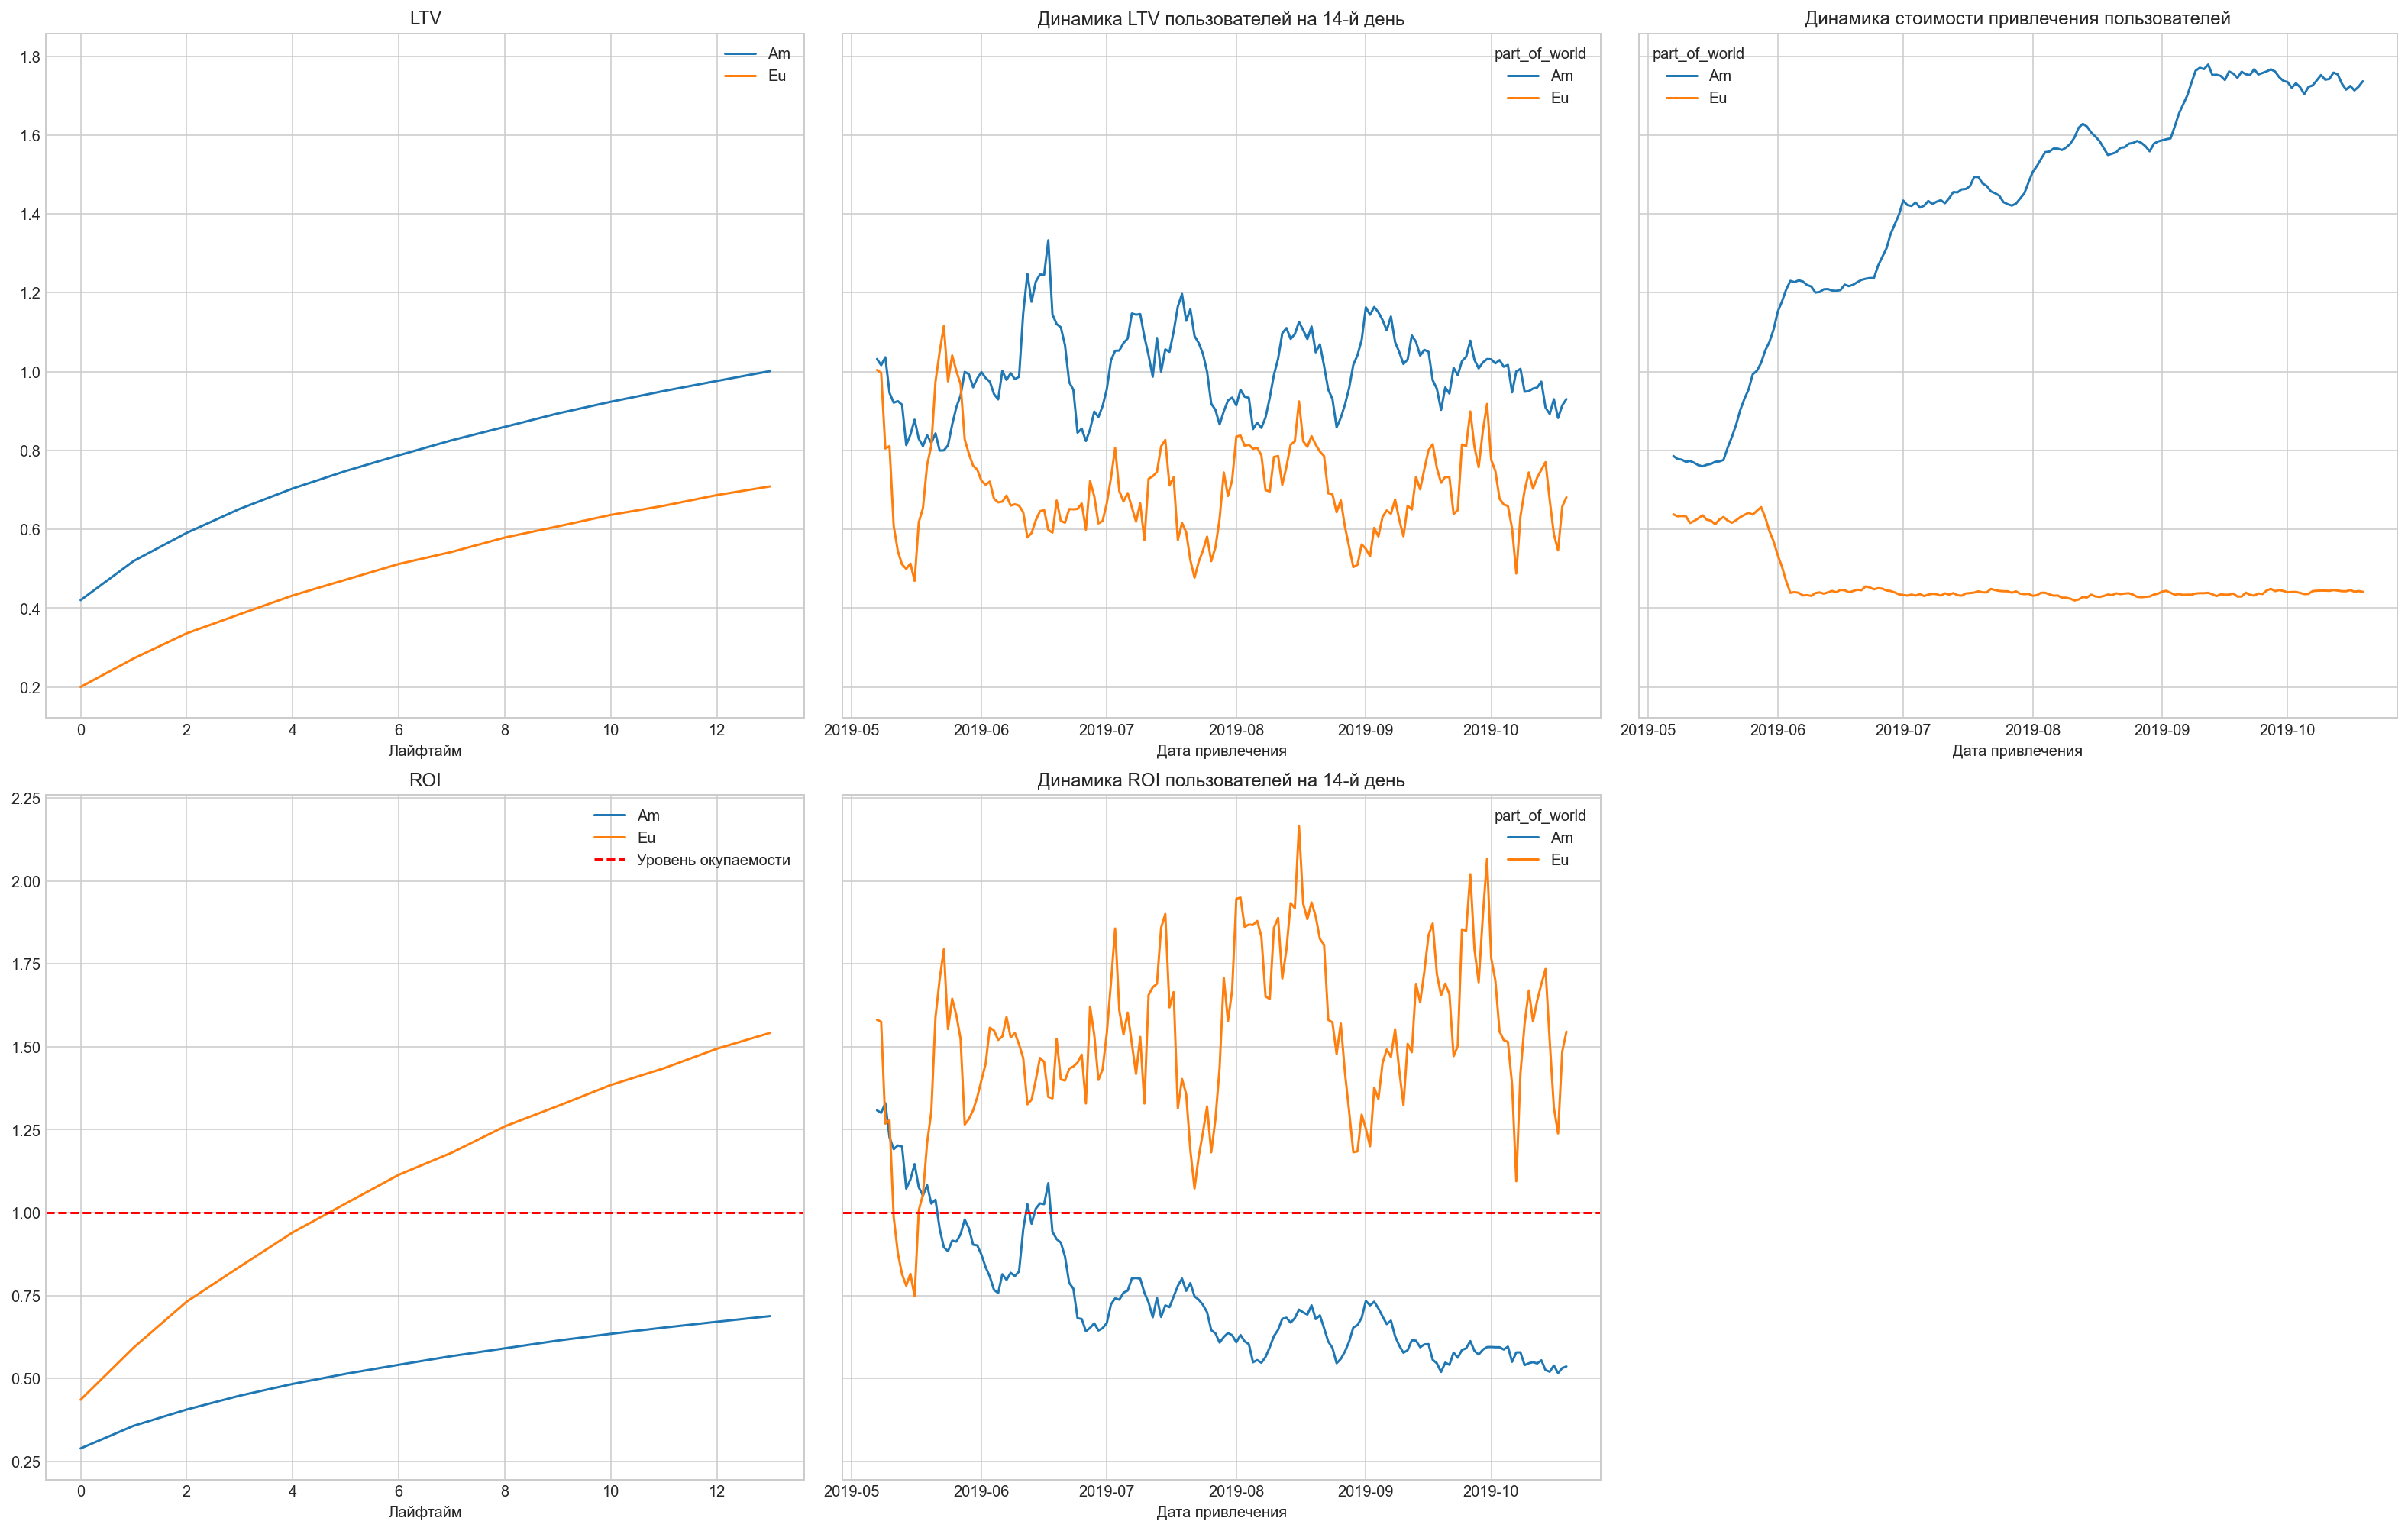

In [74]:
plot_ltv_roi(ltv_world, ltv_history_world, roi_world, roi_history_world, horizon, window=7)
# строим графики по полученным данным

**Комментарий к полученным графикам:**

- **LTV американцев достигает 1 рубля на пользователя уже к 14 дню жизни когорты**, а вот **европейские пользователи** к этому моменту приносят лишь **по 0.7 рубля** в среднем, однако без информации про стоимость привлечения делать какие-либо выводы нельзя
- говоря о динамика LTV на 14-день по когортам, то стоит отметить пользователей привлеченных в **Америке** в середине июня, эта когорта принесла целых **1.3 рубля на пользователя**, а вот для **Европы** лучшим периодом оказалась последняя неделя мая - эта когорта принесла в среднем по **1.1 рубля на пользователя**
- переходя к графику СAC, можно вспомнить то, что я писал выше про LTV, стоимость европейцев гораздо ниже - в сентябре средняя стоимость привлечения одного пользователя из **Европы была меньше в 4 раза, чем одного американца**
- неудивительно, что на графике с окупаемостью инвестиций мы наблюдаем ситуцию, что расходы на рекламу **в Америке окупаются лишь на 75% к 14 дню жизни когорты**, в то время, как **Европейские когорты приносят 50% прибыли на вложенные средства**
-  по графику динамики ROI видно, как с середины мая начинает резко снижаться ROI американских затрат, что и соответствует росту стоимости привлечения, однако стоит заметить, даже до того, как начался рост на рекламном аукционе в США
- в середине августа можно наблюдать самый большой отрыв европейских инветсиций от американских - **показатель ROI европейских когорт выше на 150%**


In [77]:
ltv_raw_world_channel, ltv_world_channel, ltv_history_world_channel, roi_world_channel, roi_history_world_channel \
= get_ltv(paid_profiles, orders,observation_date, horizon_days, dimensions=['part_of_world', 'channel'])
# получаем таблицы LTV и ROI в разрезе по каналу привлечения с учетом региона - США или Европа

In [81]:
paid_profiles['channel'].unique()

array(['FaceBoom', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

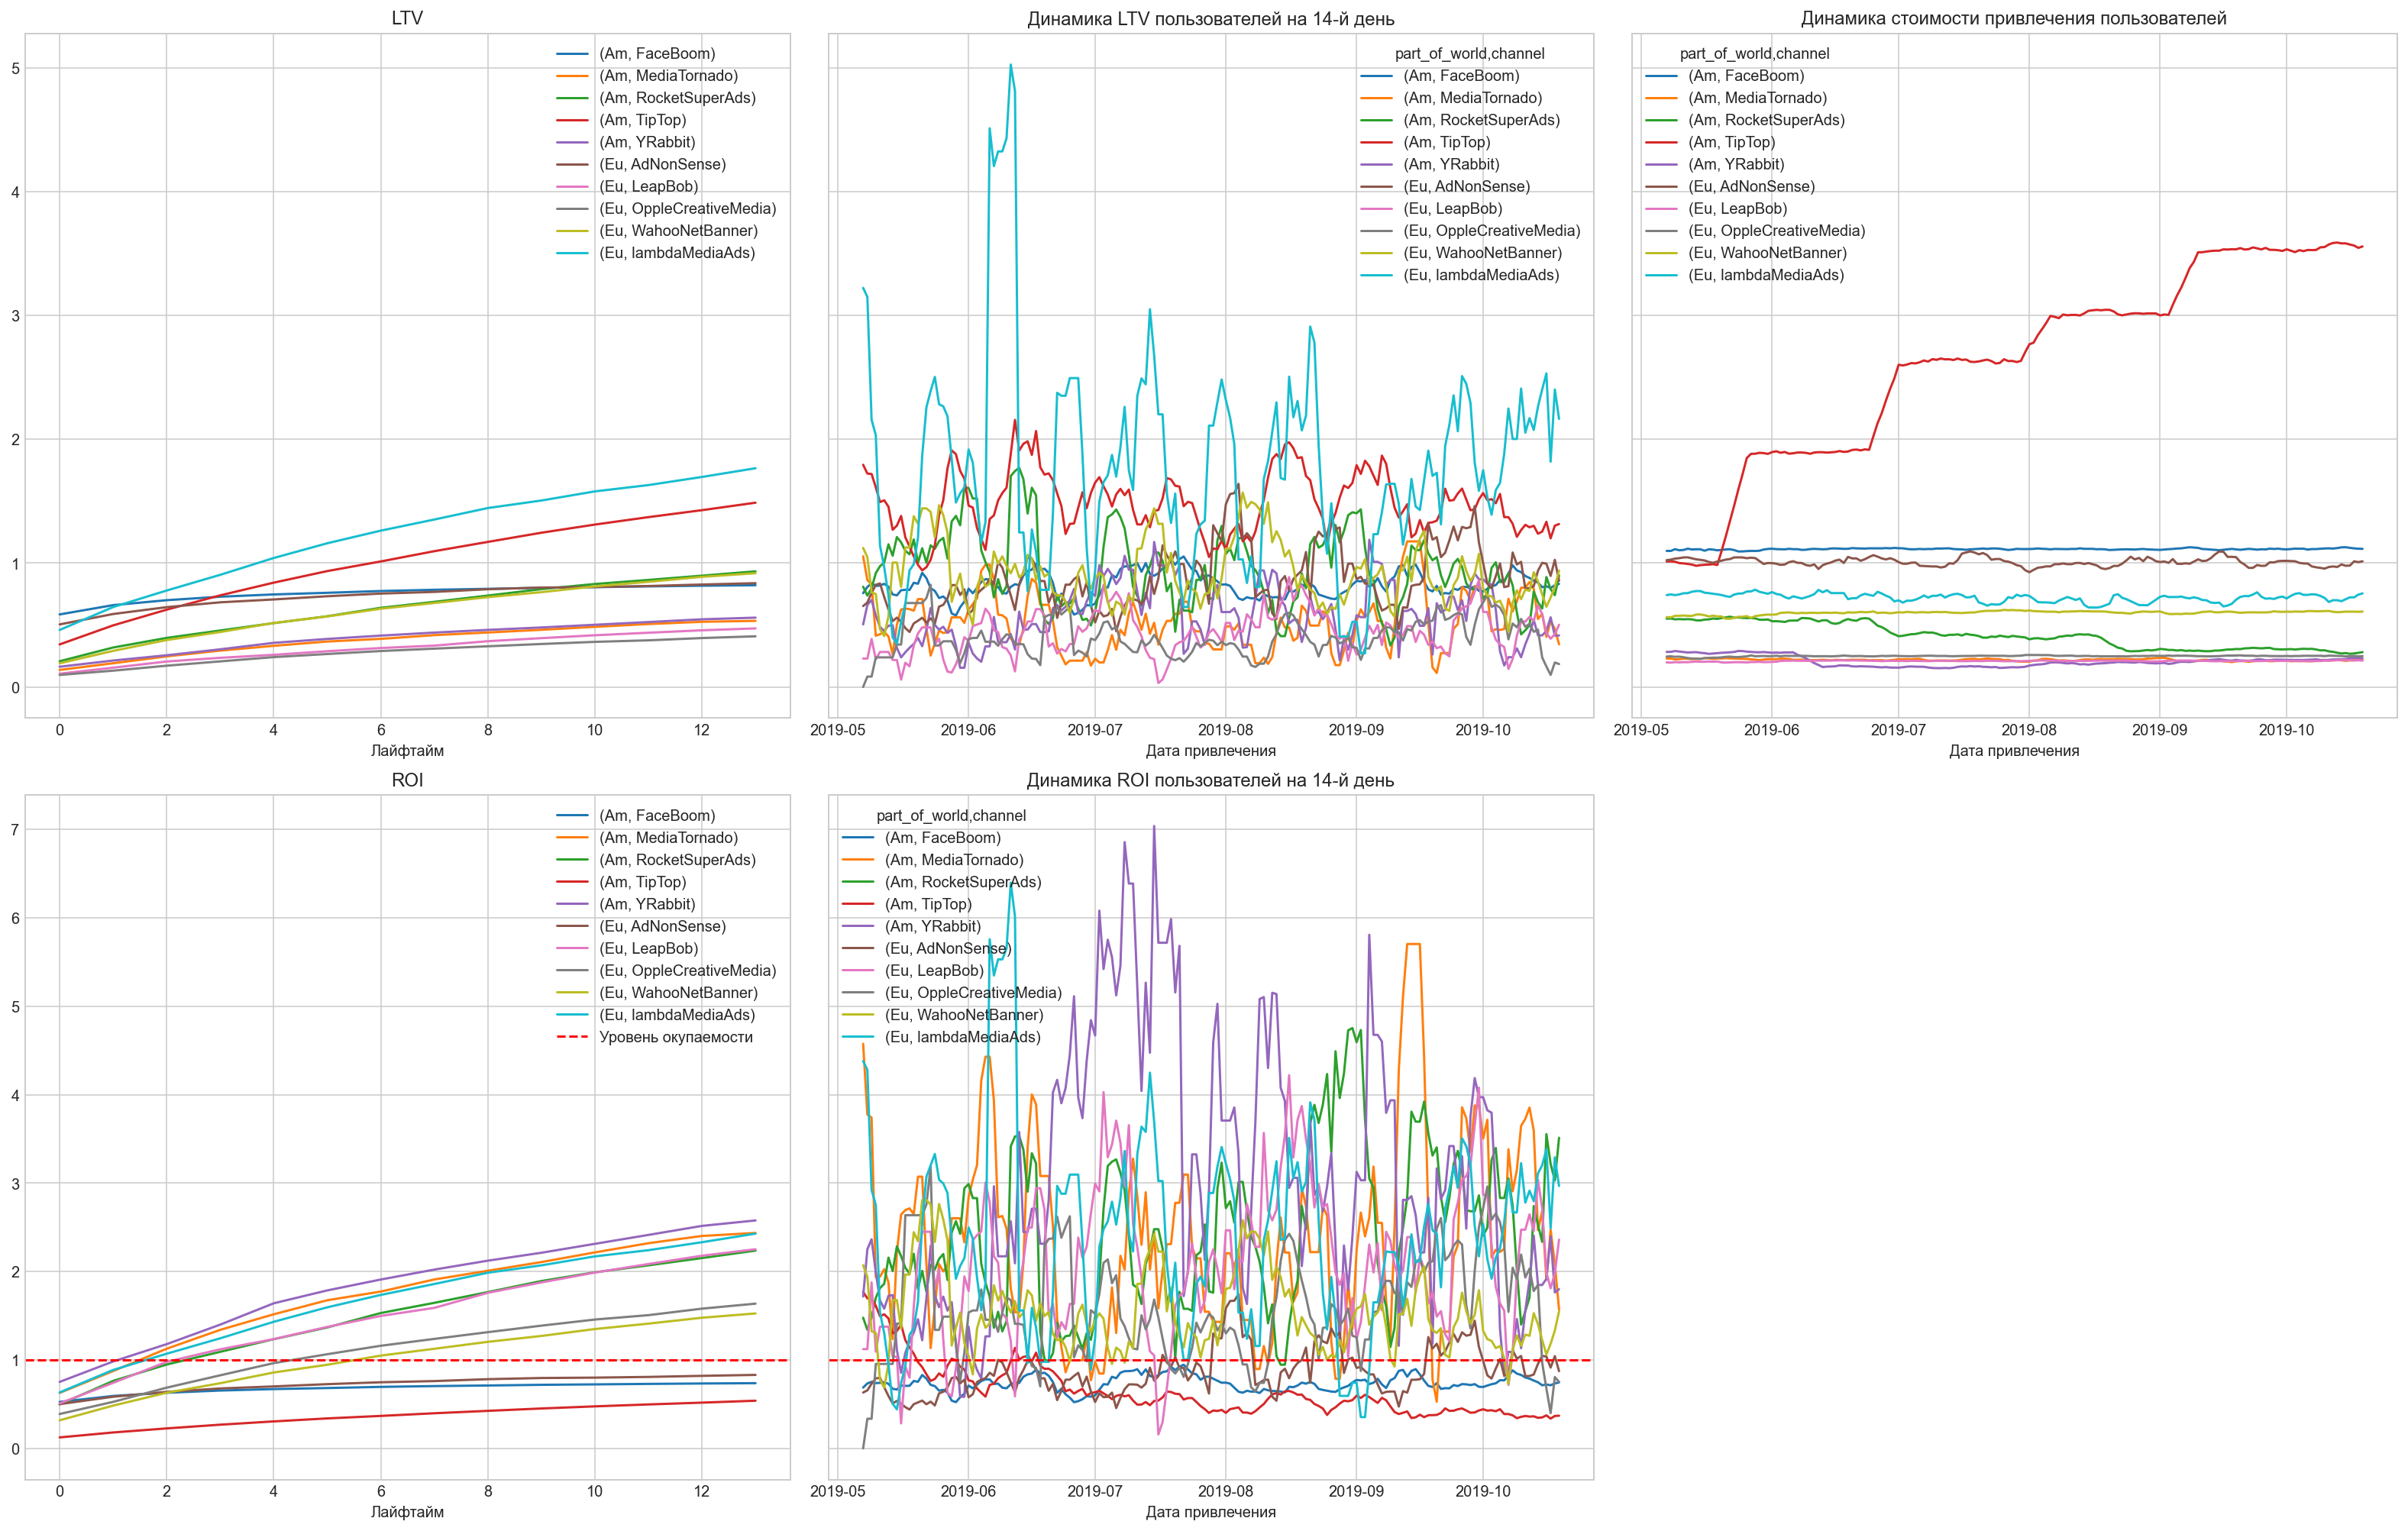

In [79]:
plot_ltv_roi(ltv_world_channel, ltv_history_world_channel, roi_world_channel, roi_history_world_channel, horizon, window=7)
# строим графики по полученным данным

**Комментарий к полученным графикам:**

- по **LTV американские каналы** привычно выше европейских - среди топ-5 каналов по величине средней выручки на пользователя 3 американских, среди которых 2 занимают лидерские позиции, однако наибольший LTV у  **европейского канала - lambdaMediaAds** - практически достигает 2 рублей на привлеченного юзера
- говоря о динамика LTV на 14-день по когортам, то стоит отметить пользователей привлеченных в **Европе** через канал "lambdaMediaAds" в первые 2 недели июня, LTV этих когорт доходит до целых 5 рублей на привлеченного пользователя - это абсолютный максимум за исследуемый период 
- переходя к графику СAC, можно заметить, что рост стоимости привлечения обусловлен лишь одним каналом - "TipTop", поскольку СAC в "FaceBoom" стабильны, все остальные каналы ведут себя так же предсказуемо, как и "FaceBoom"
- по графику ROI видно, что лишь 3 канала из 10 **не окупаются - это "TipTop", "FaceBoom" и "AdNonSense"**, остальные же каналы окупаются уже на **2 день жизни клиентов**, за исключением "OppleCreativeMedia" и "WahooNetBanner" - эти каналы окупаются за **6 дней**
- рассматривая динамику ROI на 14-день по когортам, стоит отметить пользователей привлеченных в последнюю неделю июня и в первые 3 недели июля, то есть в датах это около **24.06 - 23.07**, через канал с самым высоким показателем ROI - **"YRabbit"**

## Шаг 6.  Выводы

**Подводя итог моему исследованию, необходимо выделить следуюшие ключевые моменты:**

- наибольший LTV у пользователей **Mac**, наименьший - **PC**
- переходя к рассмотрению LTV в разбивке по стране пользователей, отмечаем **США**, как лидера, а вот аутсайдером является **Франция**, однако с привлечением юзеров на рынке США - беда, **стоимость привлечения взлетела с 0.35 - 0.38 до 1.1 и более** за пользователя, что эквивалентно **росту более чем на 300%** 
-  по **LTV американские каналы** привычно выше европейских - среди топ-5 каналов по величине средней выручки на пользователя 3 американских, среди которых 2 занимают лидерские позиции, однако наибольший LTV у  **европейского канала - lambdaMediaAds** - практически достигает 2 рублей на привлеченного юзера
- стоимость привлечения европейцев гораздо ниже - в сентябре средняя стоимость привлечения одного пользователя из **Европы была меньше в 4 раза, чем одного американца**
- по графику динамики ROI видно, как с середины мая начинает снижаться ROI, что и соответствует росту стоимости привлечения, однако стоит заметить, даже до того, как начался рост на рекламном аукционе в США, **показатель ROI пользователей из США был гораздо ниже**, чем на рынках европейских стран - **разница на 150% и более**
- говоря про каналы привличения, лишь 3 канала из 10 **не окупаются - это американские "TipTop" и "FaceBoom" и европейский "AdNonSense"**


**Основываясь на вышеупомянутых фактах, я подготовил следующие рекомендации для менеджеров:**

- нужно **пересмотреть свою стратегию на американском рынке**, посколько на данный момент, все что зарабатывается в Европе перетекает в расходы на маркетинг в Америке, если у компании есть долгосрочная стратегия, то в этом случае нужно проверять цифры, сходятся ли они с планом или нет, и уже корректировать свои действия с учетом новых обстоятельств
- прежде всего, нужно **перераспределить бюджеты среди американских маркетинговых каналов**, поскольку у нас есть **"TipTop" и "FaceBoom"**, которые имеют более **70-80% общего маркетингового бюджета**, а значит это около **90-95% американского бюджета**, следовательно, такие каналы, как **"YRabbit" и "MediaTornado"** используются непотимально, ведь **ROI у них более 200%**
- а также нужно **вкладывать больше средств в Европу**, текущая ситуация демонстрирует, что рынок Европы и близко не достиг пика, это подтверждается тем, что ROI всех европейских каналов, кроме **"AdNonSense"**, окупаются
- более того, **"LeapBob" и "lambdaMediaAds" окупаются более, чем в 2 раза**
- а также при проектировании маркетинговых кампаний стоит учитывать особенности разных стран и девайсов - стараться таргетироваться на пользователей **Apple - владельцев Iphone и Mac**